# Projet 5 : Segmentation des clients d'un site d'e-commerce - Analyse Exploratoire

In [1]:
# Chargement modules
from datetime import date
from IPython.display import display
import json
import matplotlib.pyplot as plt
import numpy asnp
import pandas as pd
import seaborn as sns

pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)

## 1- Lecture des fichiers de data

In [2]:
data_custom = pd.read_csv(r'archive\olist_customers_dataset.csv')
data_geo = pd.read_csv(r'archive\olist_geolocation_dataset.csv')
data_ord_it = pd.read_csv(r'archive\olist_order_items_dataset.csv')
data_ord_pay = pd.read_csv(r'archive\olist_order_payments_dataset.csv')
data_ord_rev = pd.read_csv(r'archive\olist_order_reviews_dataset.csv')
data_orders = pd.read_csv(r'archive\olist_orders_dataset.csv')
data_prod = pd.read_csv(r'archive\olist_products_dataset.csv')
data_sellers = pd.read_csv(r'archive\olist_sellers_dataset.csv')
data_trans = pd.read_csv(r'archive\product_category_name_translation.csv')

In [3]:
display("data_custom", data_custom.head(), "data_geo", data_geo.head(),
        "data_ord_it", data_ord_it.head(), "data_ord_pay", data_ord_pay.head(),
        "data_ord_rev", data_ord_rev.head(), "data_orders", data_orders.head(),
        "data_prod", data_prod.head(), "data_sellers", data_sellers.head(),
        "data_trans", data_trans.head())

'data_custom'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'data_geo'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'data_ord_it'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'data_ord_pay'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'data_ord_rev'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'data_orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'data_prod'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'data_sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'data_trans'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
data_merge_1 = pd.merge(data_ord_it, data_ord_pay,
                        on='order_id', how='outer')
data_merge_1 = pd.merge(data_merge_1, data_ord_rev,
                        on='order_id', how='outer')
data_merge_1 = pd.merge(data_merge_1, data_orders,
                        on='order_id', how='outer')

data_merge_2 = pd.merge(data_merge_1, data_custom,
                        on='customer_id', how='outer')
data_merge_2 = pd.merge(data_merge_2, data_sellers,
                        on='seller_id', how='outer')
data_merge_2 = pd.merge(data_merge_2, data_prod,
                        on='product_id', how='outer')
data_merge_2 = pd.merge(data_merge_2, data_trans,
                        on='product_category_name', how='outer')

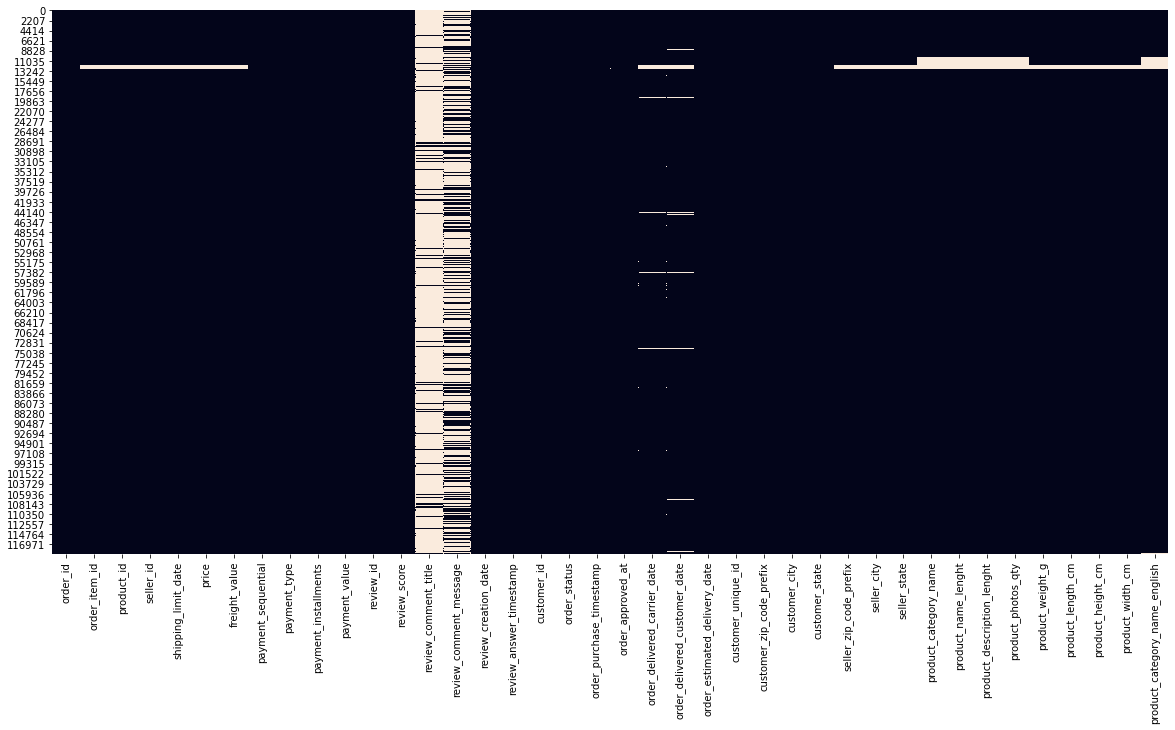

In [5]:
plt.figure(figsize=(20, 10))                  # Visualisation des NA pour DATA
sns.heatmap(data_merge_2.isna(), cbar=False)
plt.show()

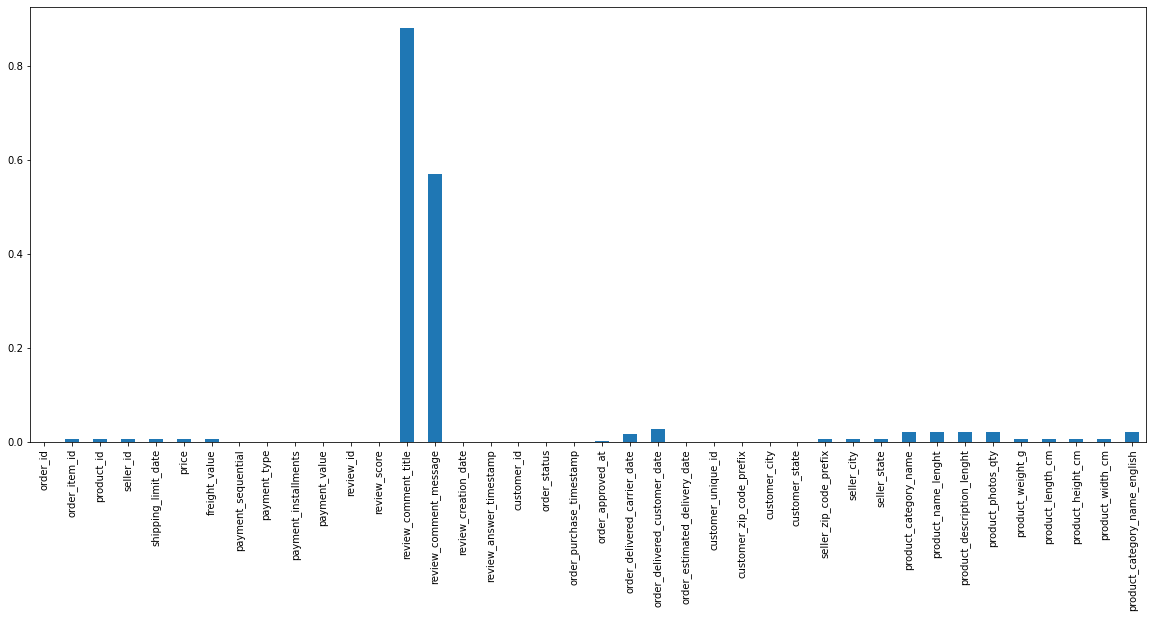

In [6]:
remp_nan = (data_merge_2.isna().sum())/(data_merge_2.shape[0])
plt.figure(figsize=(20, 8))
remp_nan.plot.bar()
plt.savefig('nan.png', bbox_inches='tight')
plt.show()

In [7]:
# Drop les commandes avec NaN < 5%
remp_nan = data_merge_2.isna().sum()/data_merge_2.shape[0]
col_nan = remp_nan[remp_nan < 0.05].index
data_merge_3 = data_merge_2.dropna(subset=col_nan)

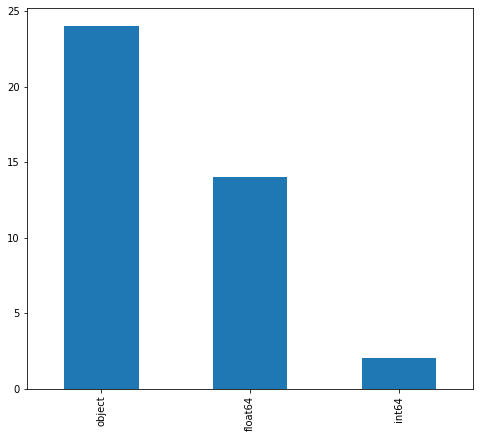

(114050, 40)

object     24
float64    14
int64       2
dtype: int64

"Les variables objets sont : ['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'payment_type', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'product_category_name_english']"

"Les variables float sont : ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']"

"Les variables int sont : ['review_score', 'customer_zip_code_prefix']"

In [8]:
# Description du dataset
plt.figure(figsize=(8, 7))
data_merge_3.dtypes.value_counts().plot.bar()
plt.show()
object_col = data_merge_3.dtypes[data_merge_3.dtypes == 'object'].index
float_col = data_merge_3.dtypes[data_merge_3.dtypes == 'float64'].index
int_col = data_merge_3.dtypes[data_merge_3.dtypes == 'int64'].index

display(data_merge_3.shape, data_merge_3.dtypes.value_counts(),
        f"Les variables objets sont : {object_col.to_list()}",
        f"Les variables float sont : {float_col.to_list()}",
        f"Les variables int sont : {int_col.to_list()}")

In [9]:
# Changements des dtypes en fonction des variables

date_var = ['shipping_limit_date', 'review_creation_date',
            'review_answer_timestamp', 'order_purchase_timestamp',
            'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date']
object_var = ['order_id', 'product_id', 'seller_id', 'payment_type',
              'review_id', 'customer_id', 'order_status', 'customer_unique_id',
              'customer_city', 'customer_state', 'seller_city', 'seller_state',
              'product_category_name', 'product_category_name_english']
int_var = ['review_score', 'customer_zip_code_prefix',
           'seller_zip_code_prefix', 'product_photos_qty']
float_var = ['order_item_id', 'price', 'freight_value', 'payment_sequential',
             'payment_installments', 'payment_value', 'product_name_lenght',
             'product_description_lenght', 'product_weight_g',
             'product_length_cm', 'product_height_cm', 'product_width_cm']

data_merge_3[date_var] = data_merge_3[date_var].astype('datetime64')
data_merge_3[object_var] = data_merge_3[object_var].astype('str')
data_merge_3[float_var] = data_merge_3[float_var].astype('float64')
data_merge_3[int_var] = data_merge_3[int_var].astype('int64')

C:\Users\ilyas\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Analyse exploratoire des variables non agréger

In [30]:
# Divison du dataset en fonction du type de features

cat = ['order_status',
       'payment_type',
       #'customer_city',
       'customer_state',
       #'first_order_date',
       #'last_order_date',
       'product_category_name_english',
       #'seller_city',
       'seller_state']
quant = ['price', 'order_item_id',
         'freight_value', 'review_score', 'payment_value',
         'product_name_lenght', 'product_description_lenght',
         'product_photos_qty', 'product_weight_g',
         'product_length_cm', 'product_height_cm', 'product_width_cm']
date = ['shipping_limit_date', 'review_creation_date',
        'review_answer_timestamp', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']
data_merge_3_cat = data_merge_3[cat]
data_merge_3_quant = data_merge_3[quant]
data_merge_3_date = data_merge_3[date]

data_merge_3_quant_cus = data_merge_3[quant + ['customer_unique_id']]
data_merge_3_cat_cus = data_merge_3[cat + ['customer_unique_id']]

### Variables quantitatives

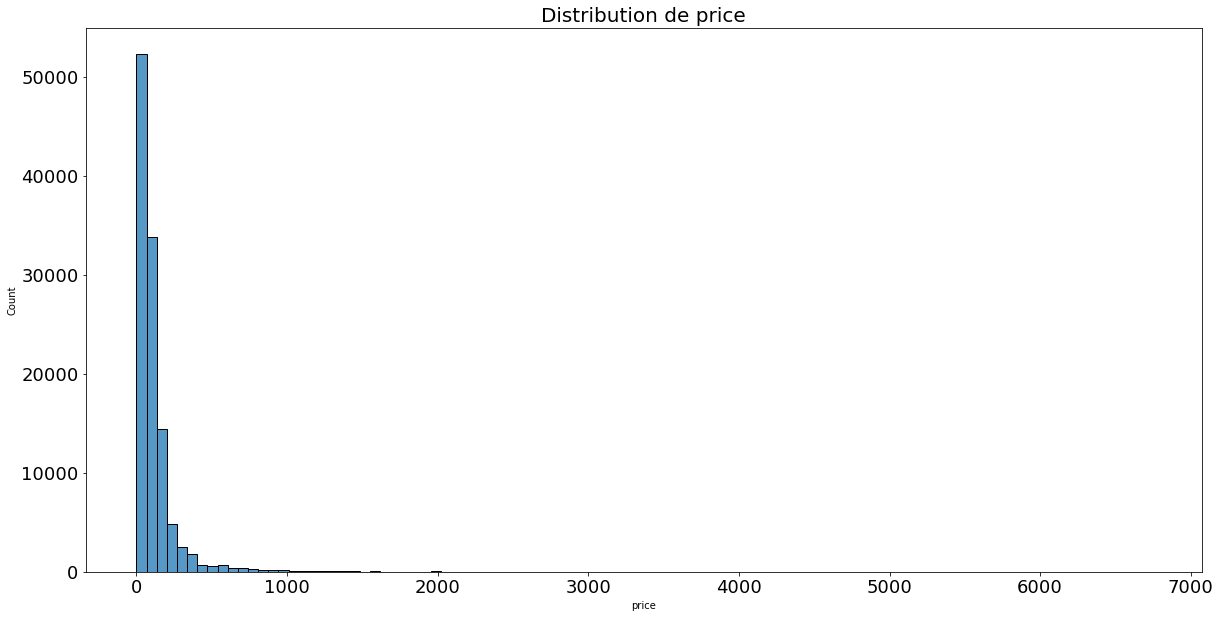

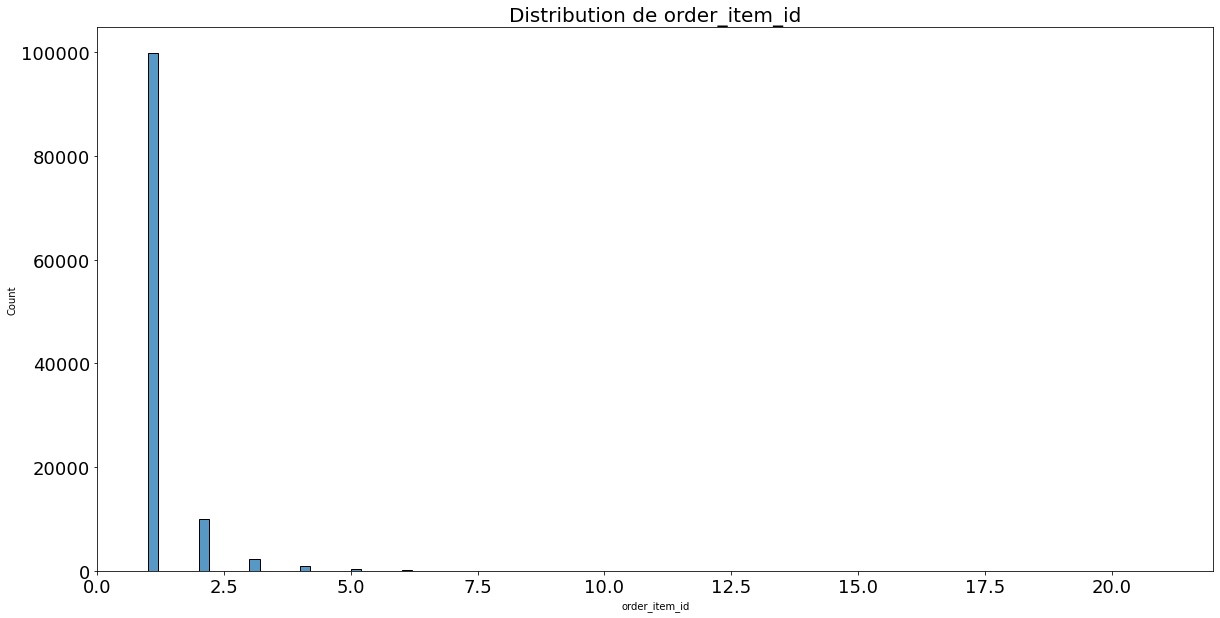

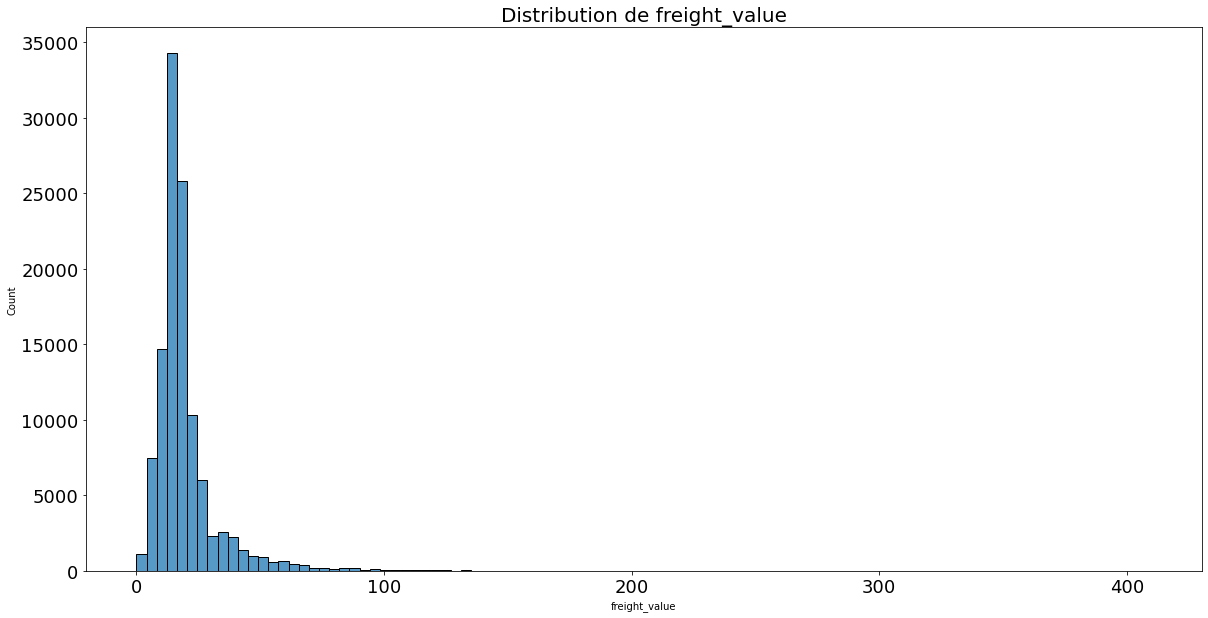

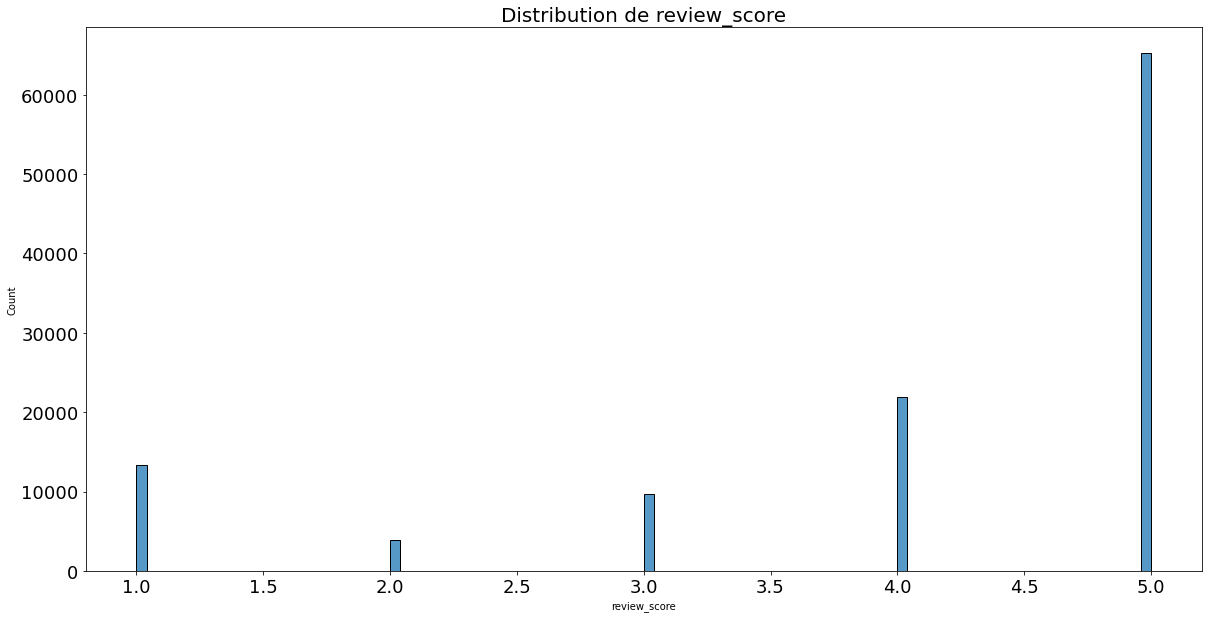

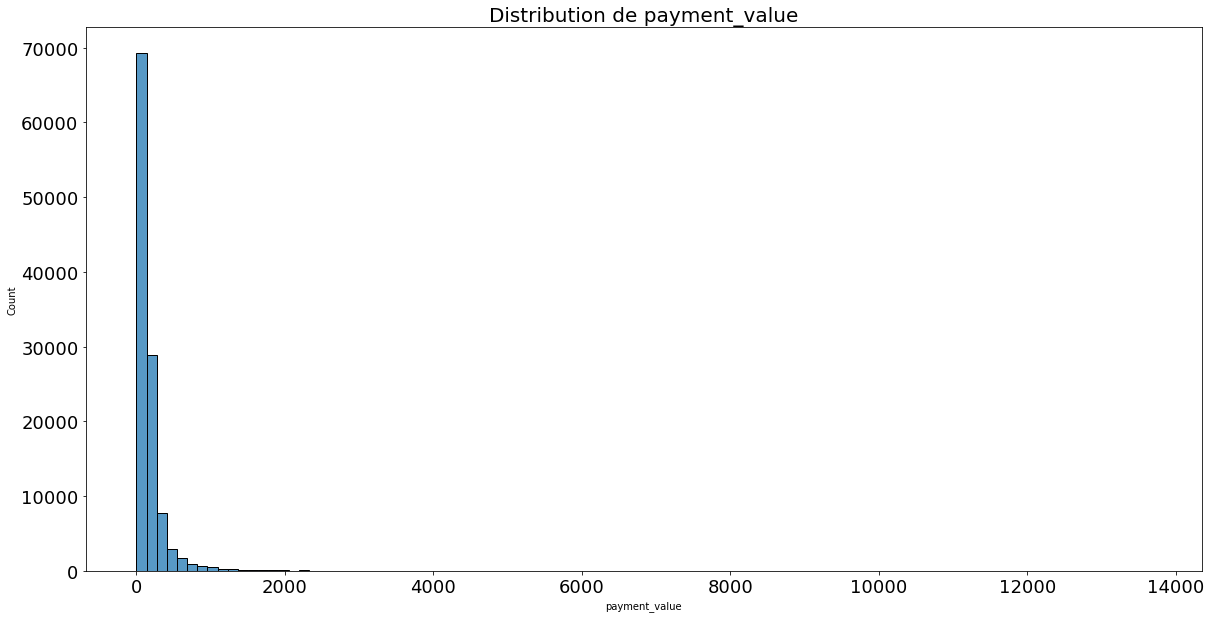

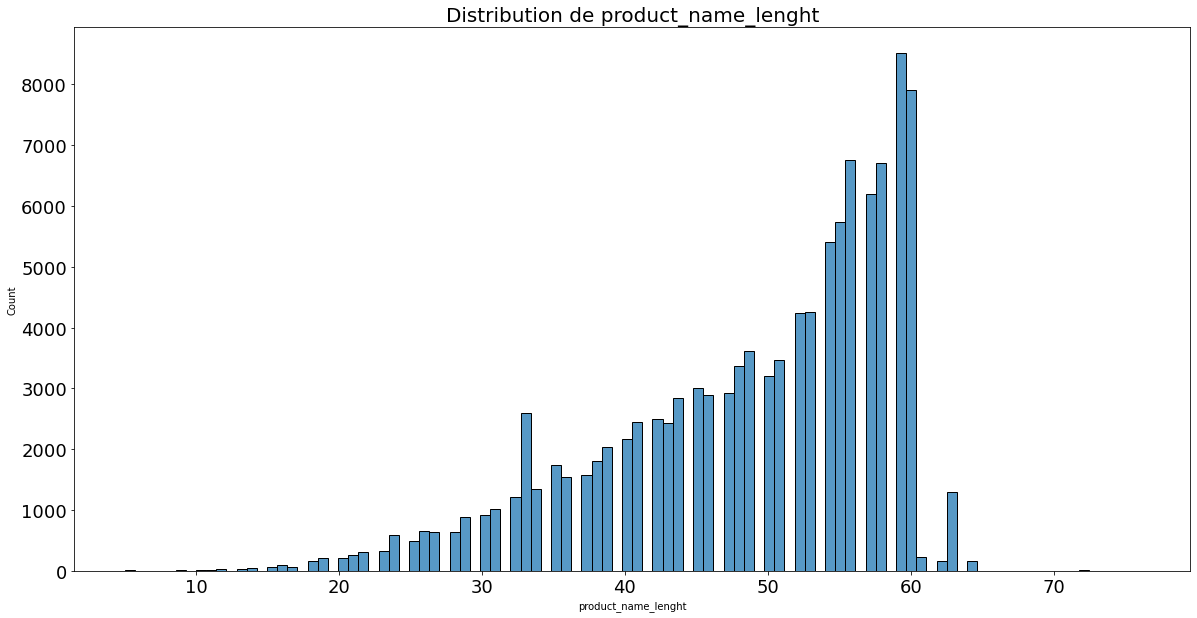

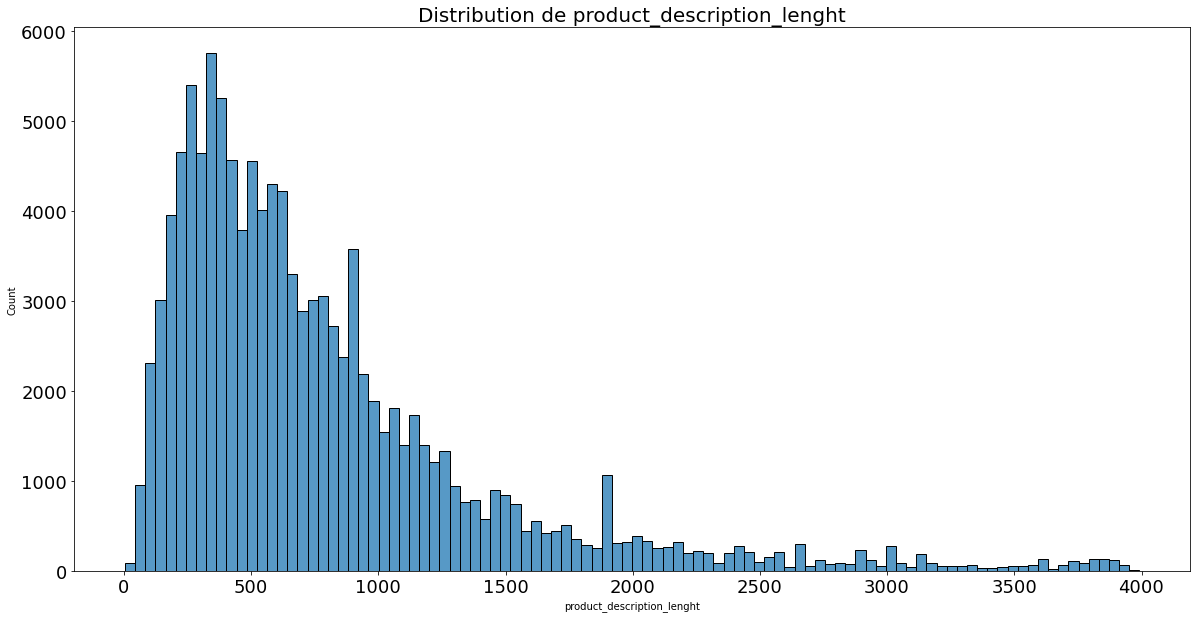

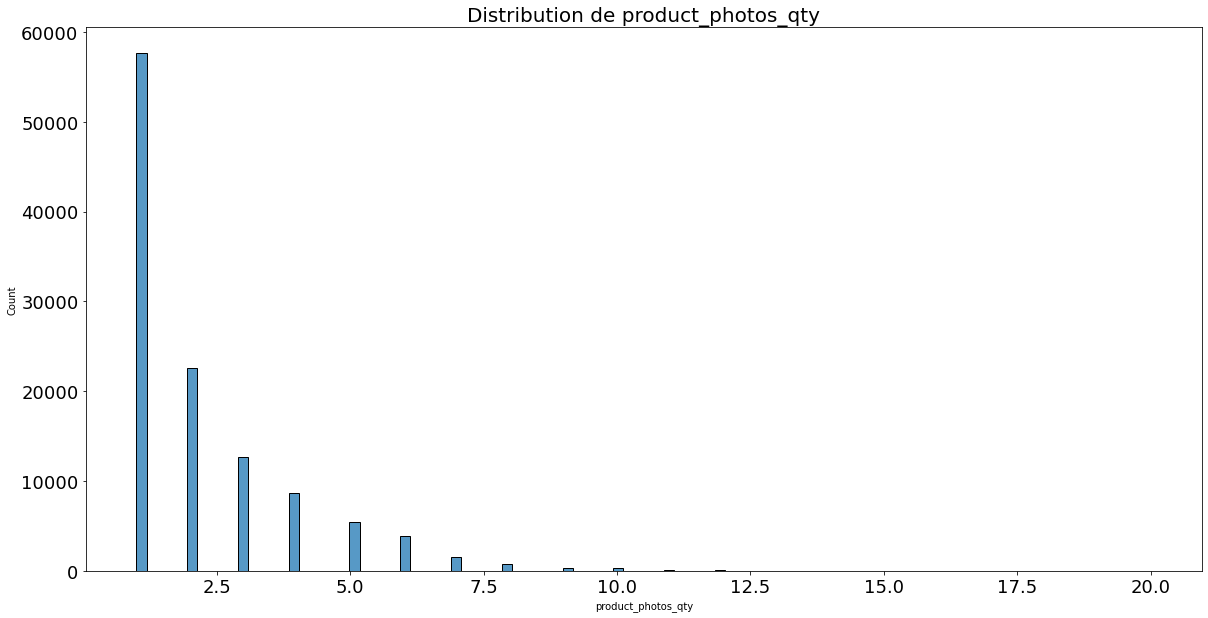

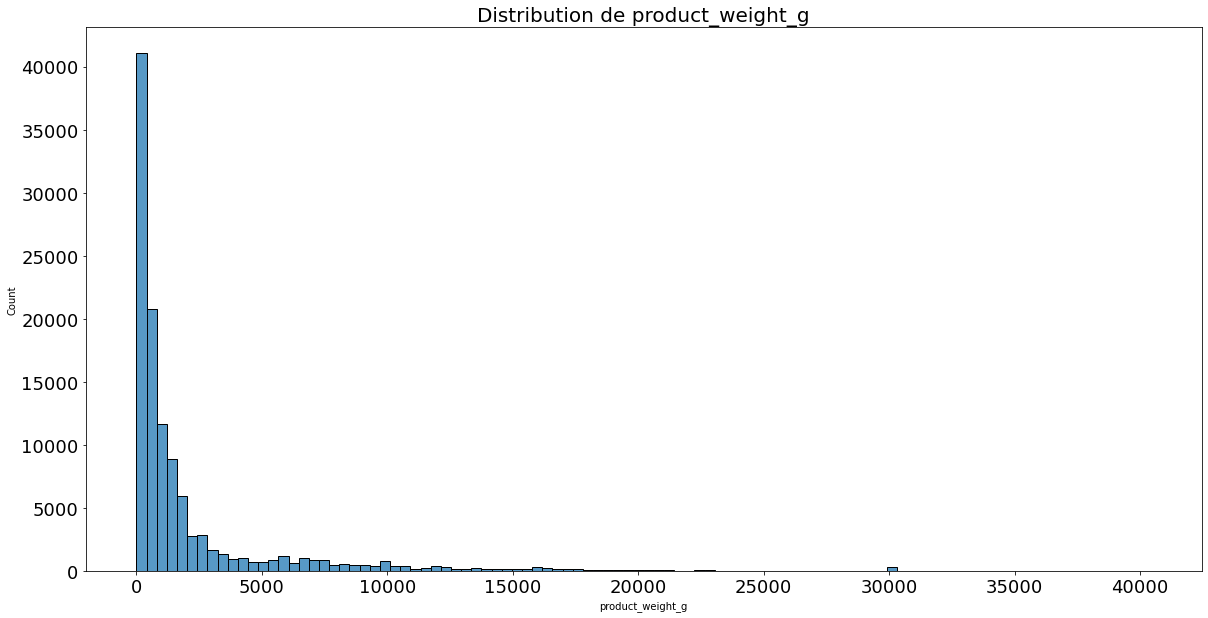

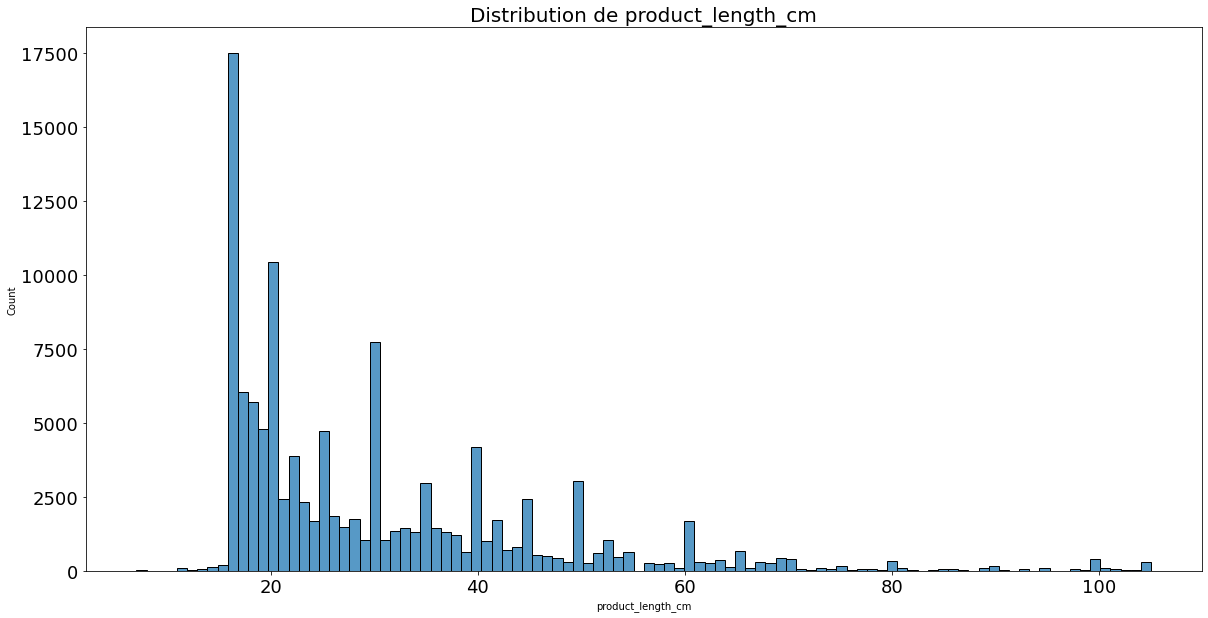

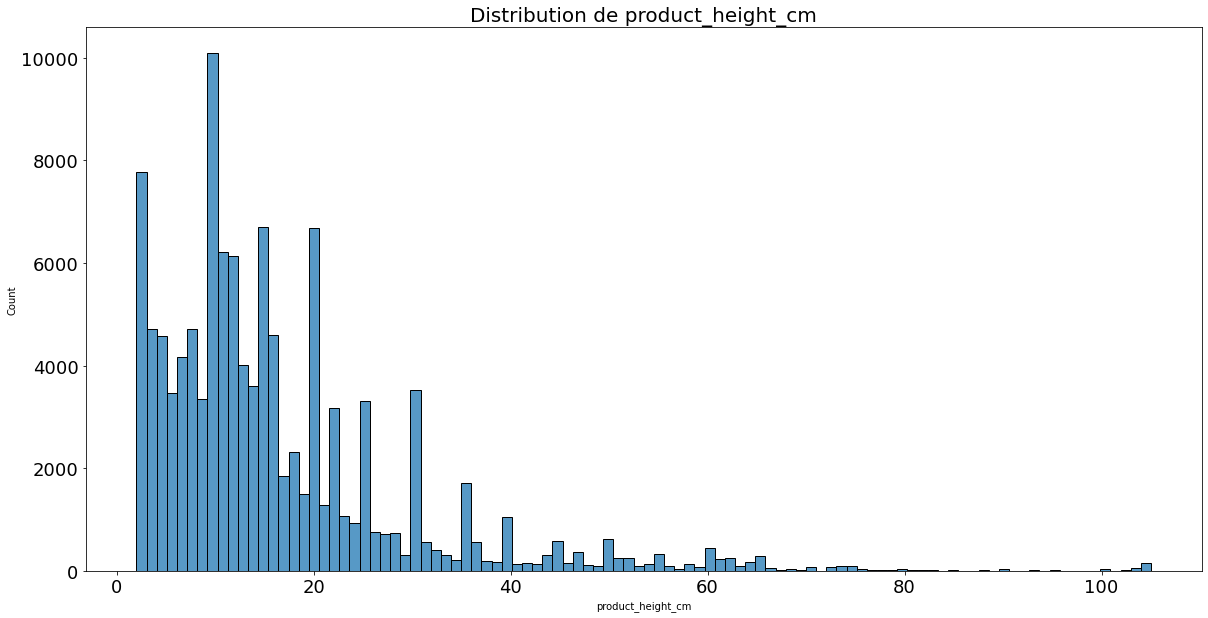

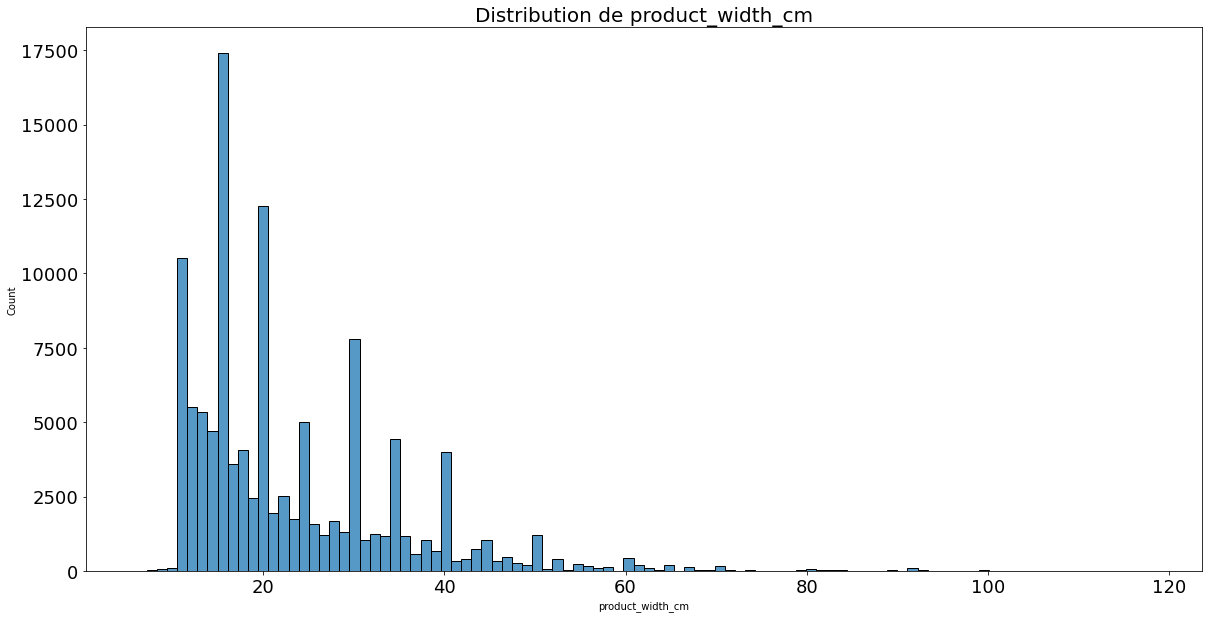

In [20]:
# Distribution des variables quantitatives

for n in range(data_merge_3_quant.shape[1]):
    plt.figure(figsize=(20, 10))
    plot = sns.histplot(x=data_merge_3_quant.iloc[:, n], bins=100)
    plt.title(f"Distribution de {data_merge_3_quant.iloc[:, n].name}",
              fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig(f"{data_merge_3_quant.iloc[:, n].name}_dist.png",
                bbox_inches='tight')
    plt.show()

In [21]:
data_merge_3_quant.describe()

,price,order_item_id,freight_value,review_score,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000,114050.000000
mean,119.992893,1.197519,20.010268,4.067242,172.123077,48.800815,784.808821,2.206348,2108.469005,30.289698,16.605769,23.105357
std,182.356635,0.703184,15.727301,1.357820,266.102671,10.017073,650.592971,1.718019,3768.549653,16.158380,13.440306,11.740651
min,0.850000,1.000000,0.000000,1.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,39.900000,1.000000,13.080000,4.000000,60.952500,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,74.900000,1.000000,16.320000,5.000000,108.060000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,133.000000,1.000000,21.190000,5.000000,189.370000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,21.000000,409.680000,5.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


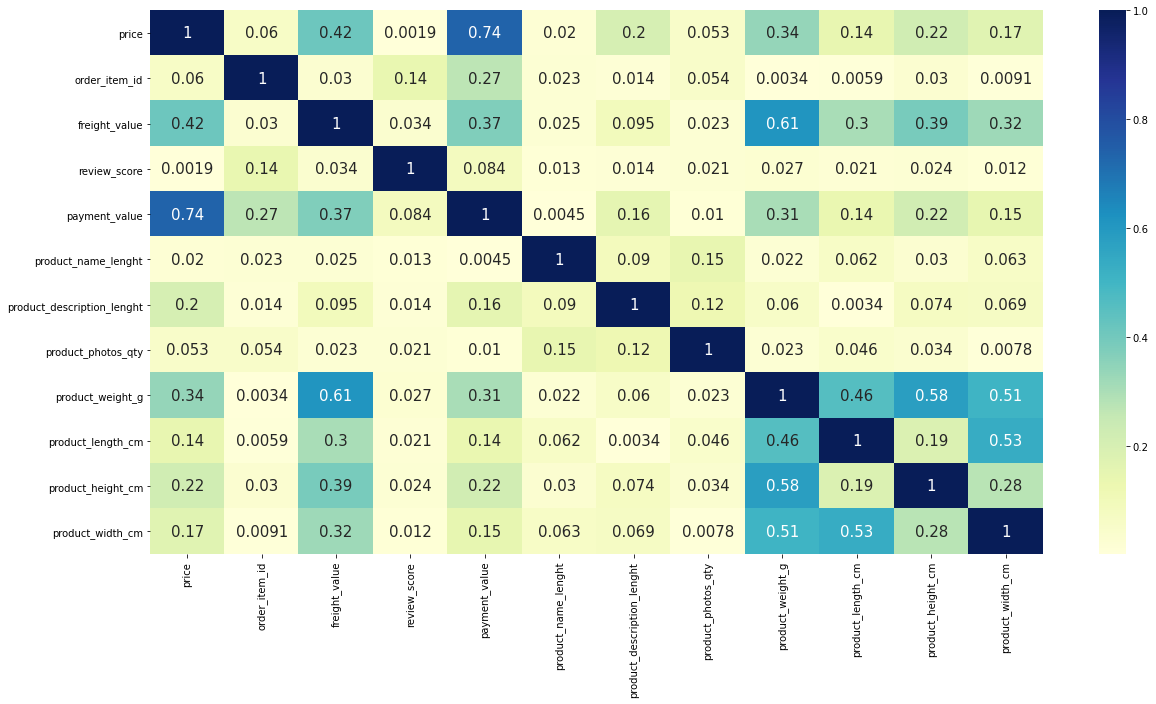

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(abs(data_merge_3_quant.corr()), annot=True, cmap="YlGnBu",
            annot_kws={"fontsize":15})
plot.set_xlabel(' ', fontsize=16)
plot.set_ylabel(f" ", fontsize=18)
plot.tick_params(labelsize=18)
plt.savefig(f"corr_table_plot.png", bbox_inches="tight")

### Variables catégorielles

In [31]:
for col in data_merge_3_cat_cus.columns:
    print(f"{col} a {len(data_merge_3_cat_cus[col].value_counts())}"
          " catégories")

order_status a 2 catégories
payment_type a 4 catégories
customer_state a 27 catégories
product_category_name_english a 71 catégories
seller_state a 22 catégories
customer_unique_id a 92062 catégories


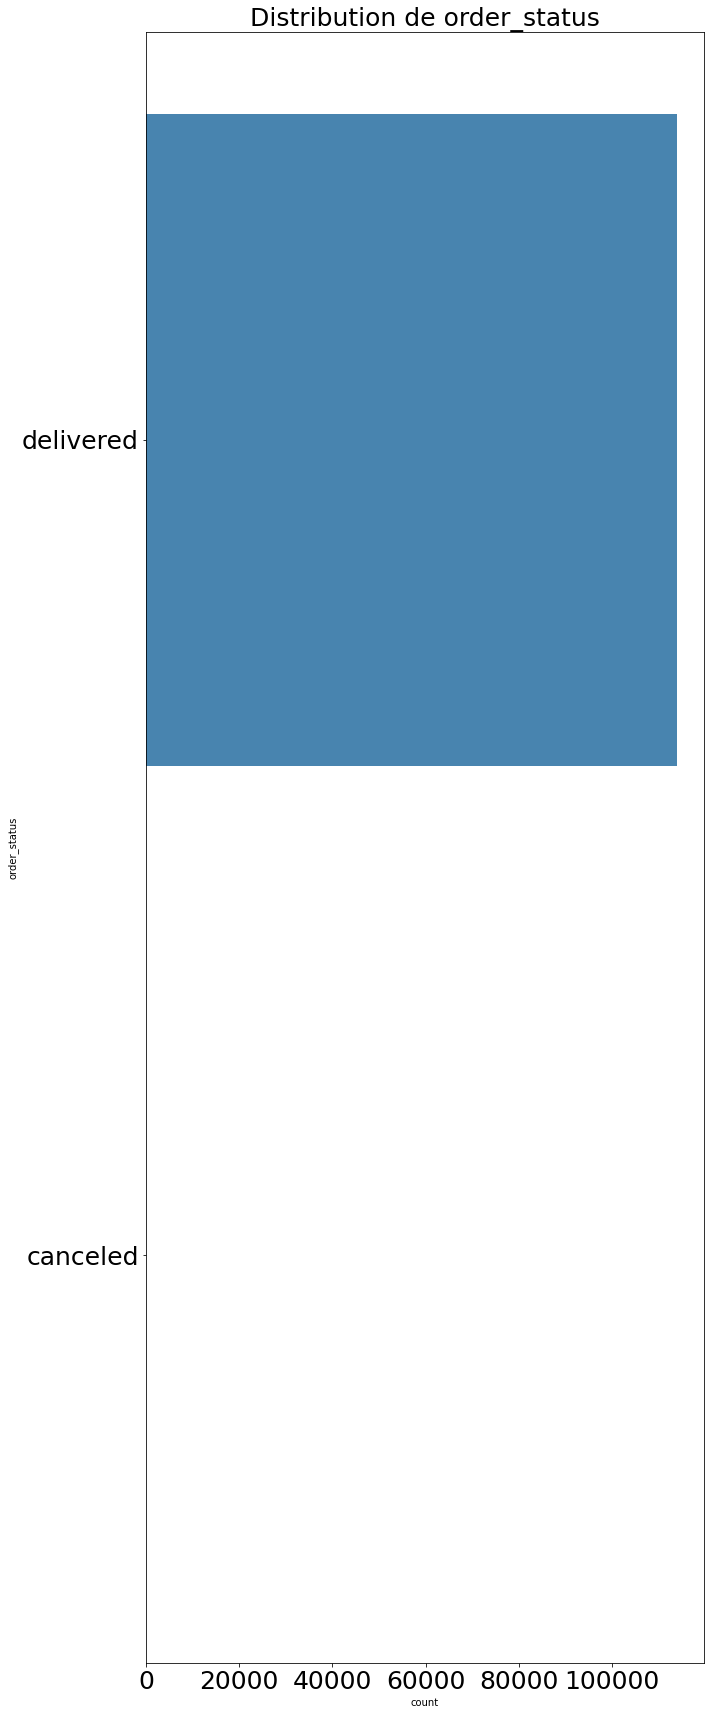

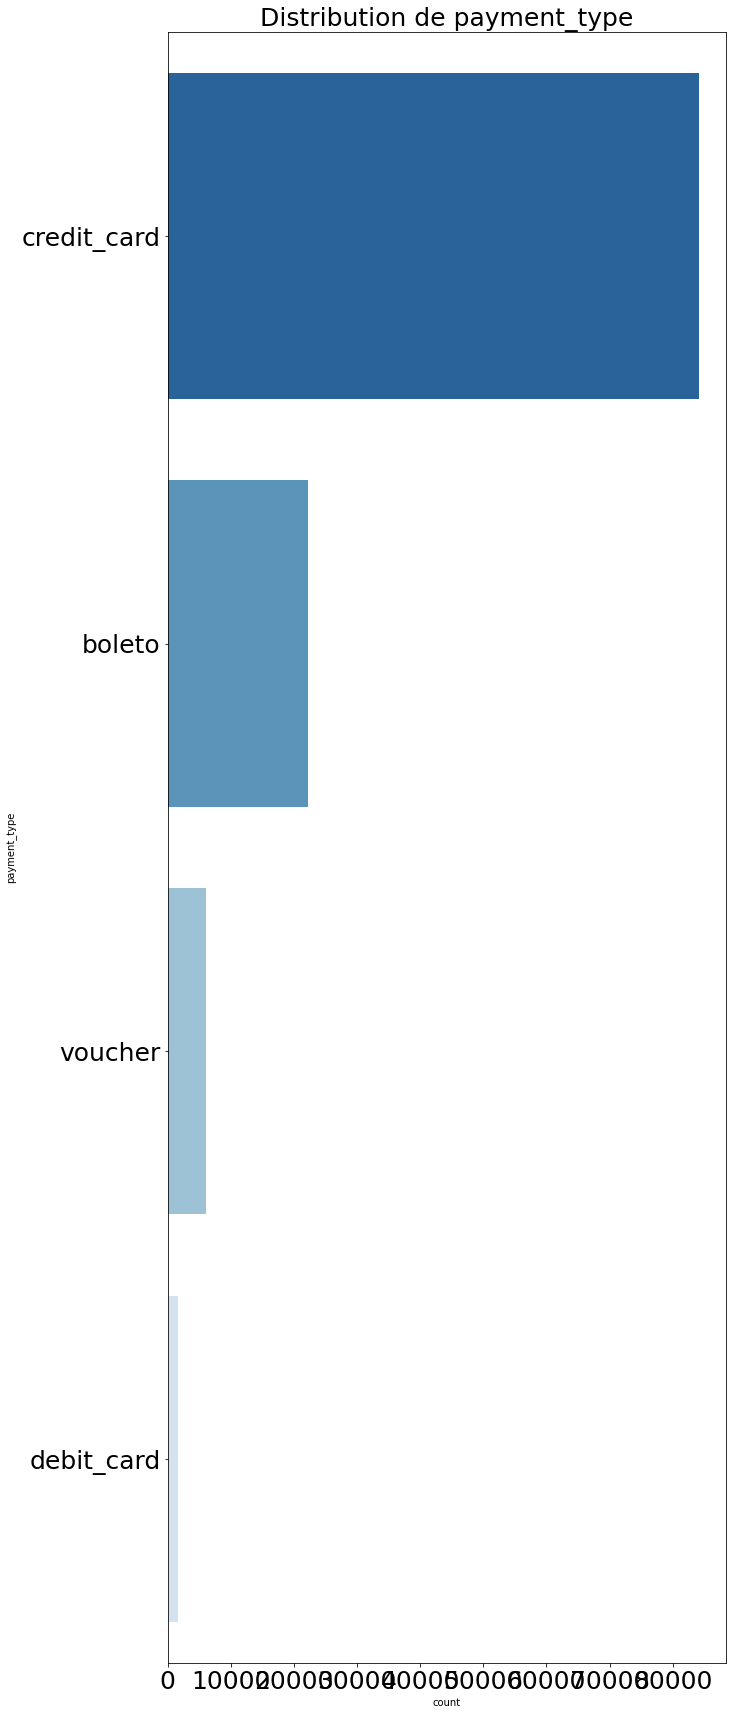

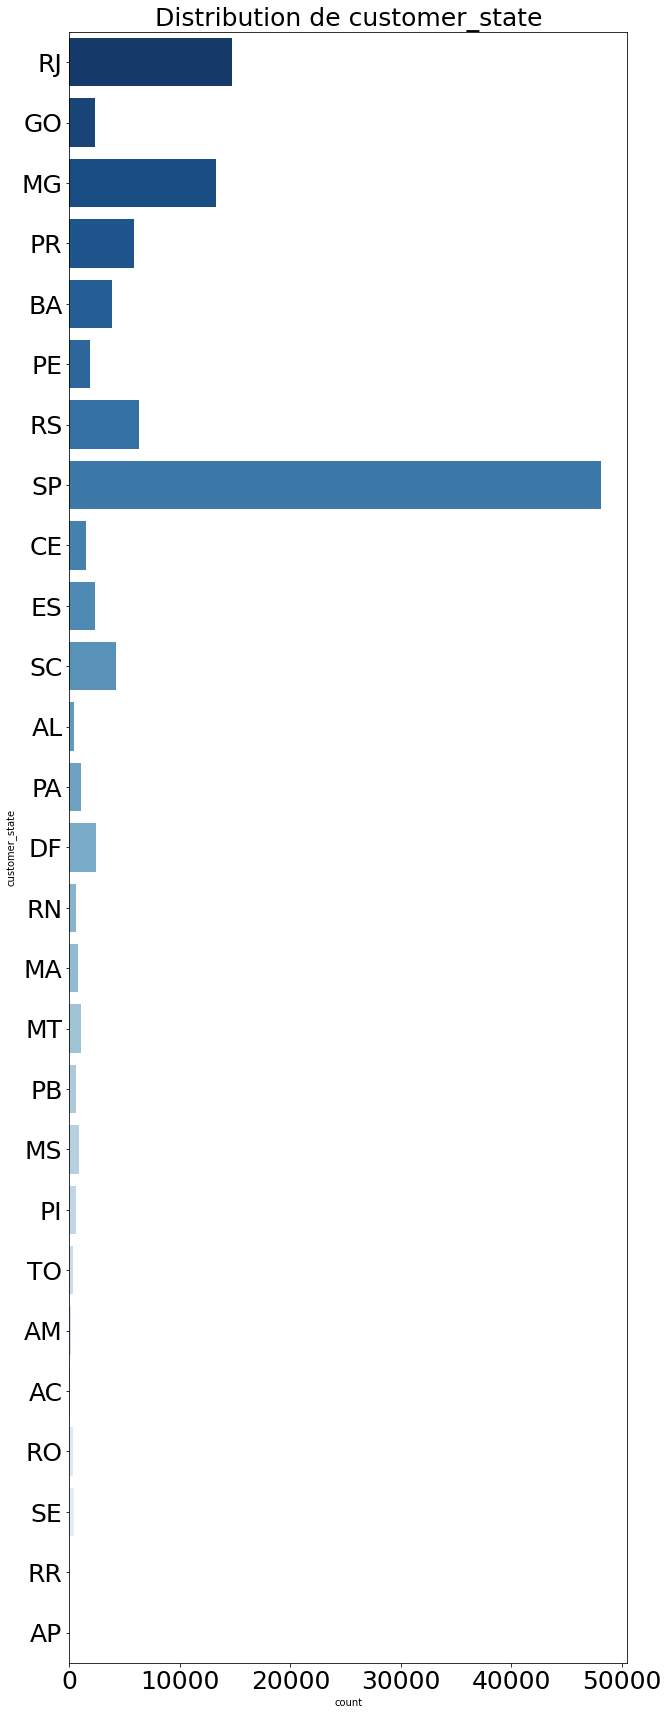

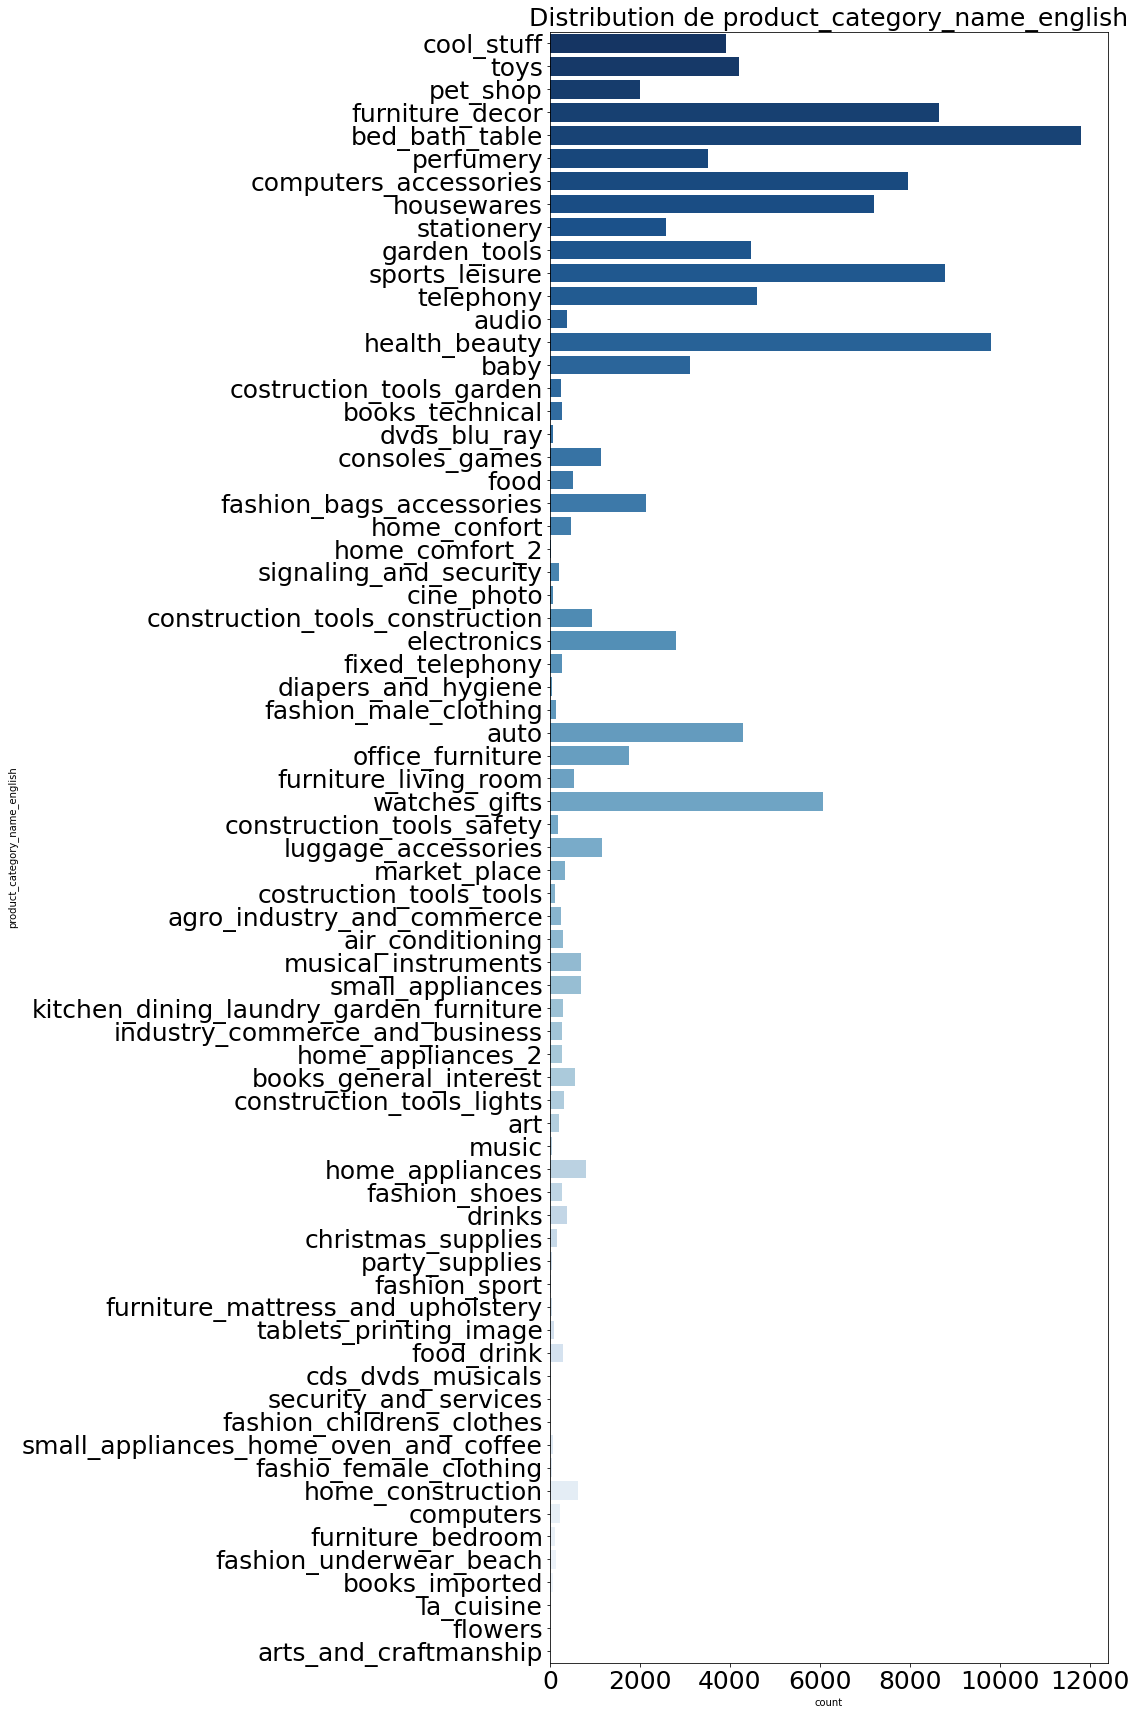

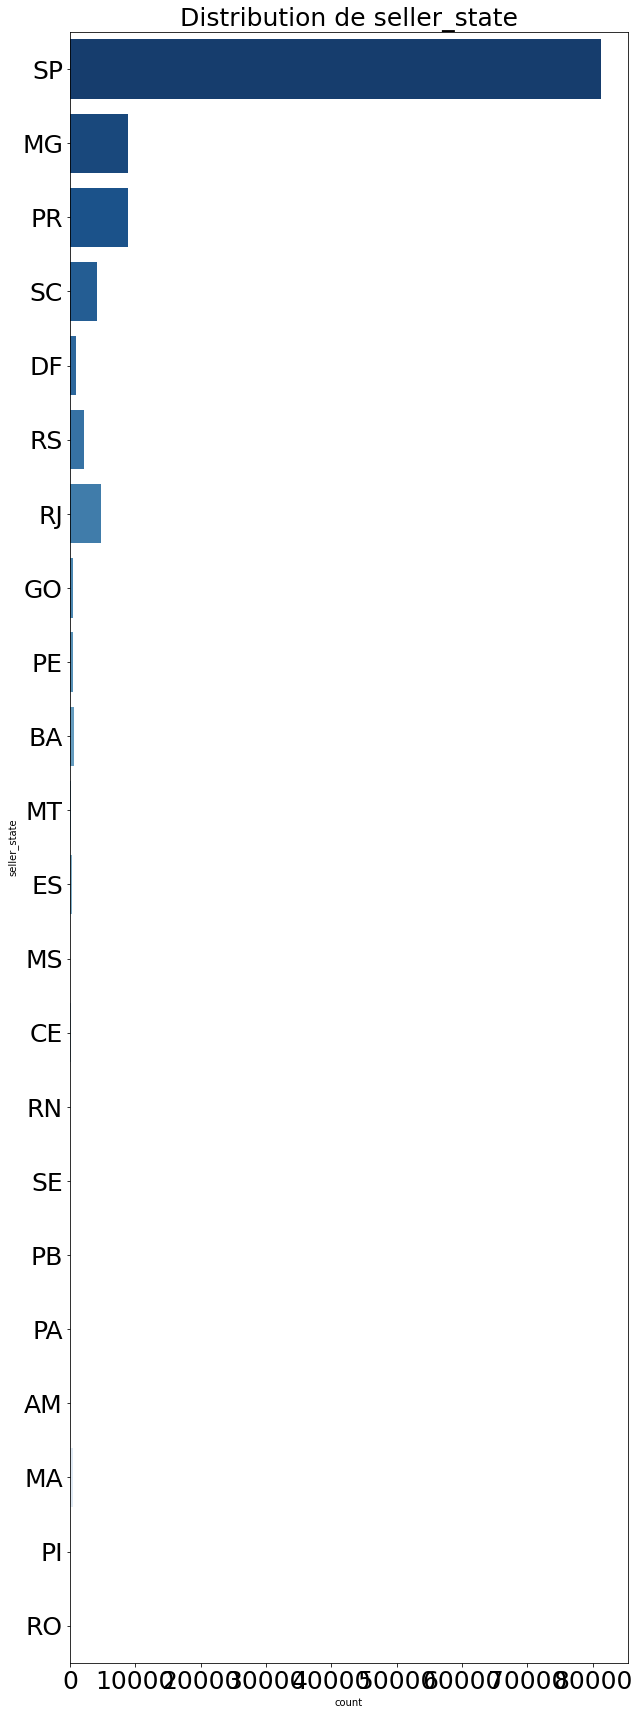

In [34]:
for n in range(data_merge_3_cat.shape[1]):
    plt.figure(figsize=(10, 30))
    plot = sns.countplot(y=data_merge_3_cat.iloc[:, n], palette='Blues_r')
    plt.title(f"Distribution de {data_merge_3_cat.iloc[:,n].name}",
              fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.savefig(f"{data_merge_3_cat.iloc[:, n].name}_dist.png",
                bbox_inches='tight')
    plt.show()

## Variables temporelles

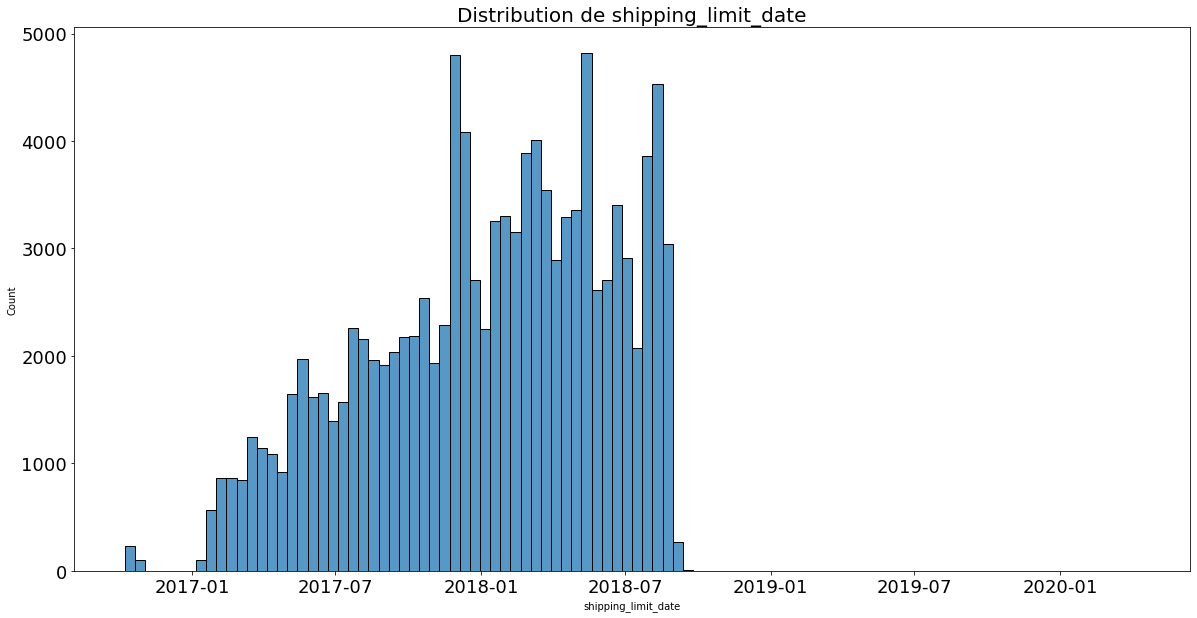

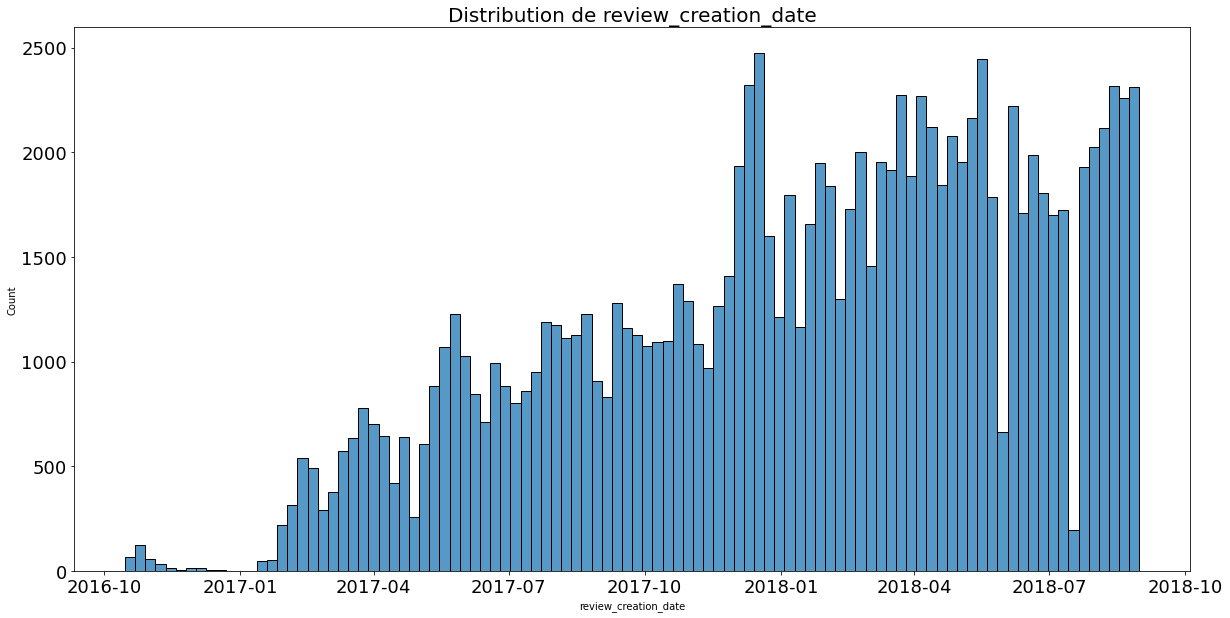

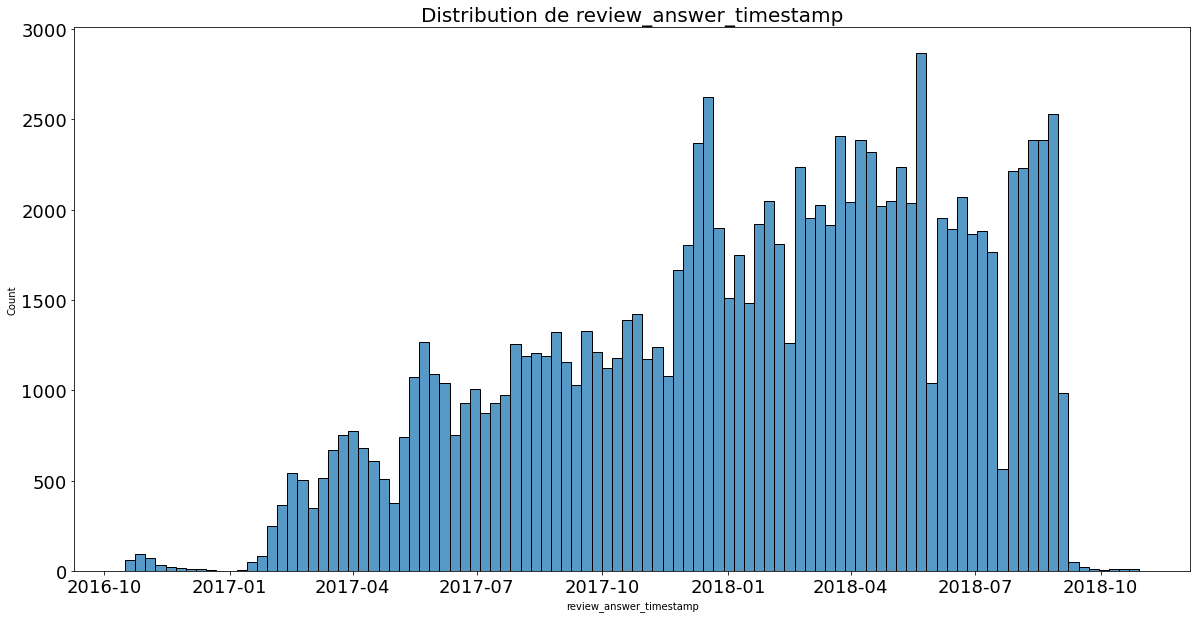

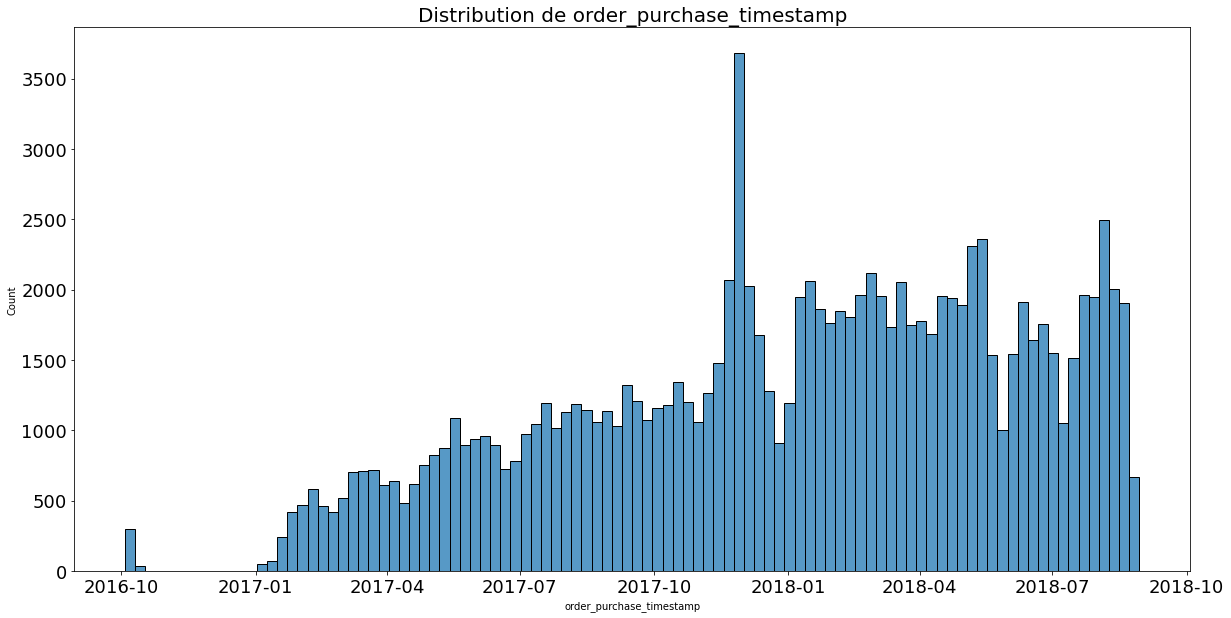

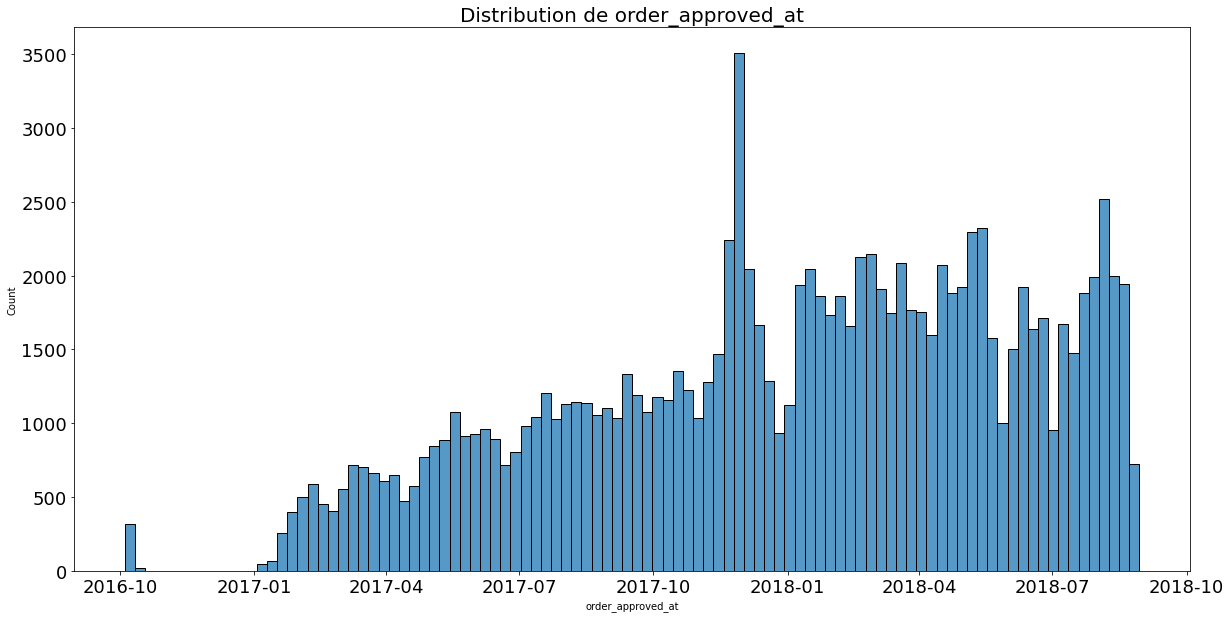

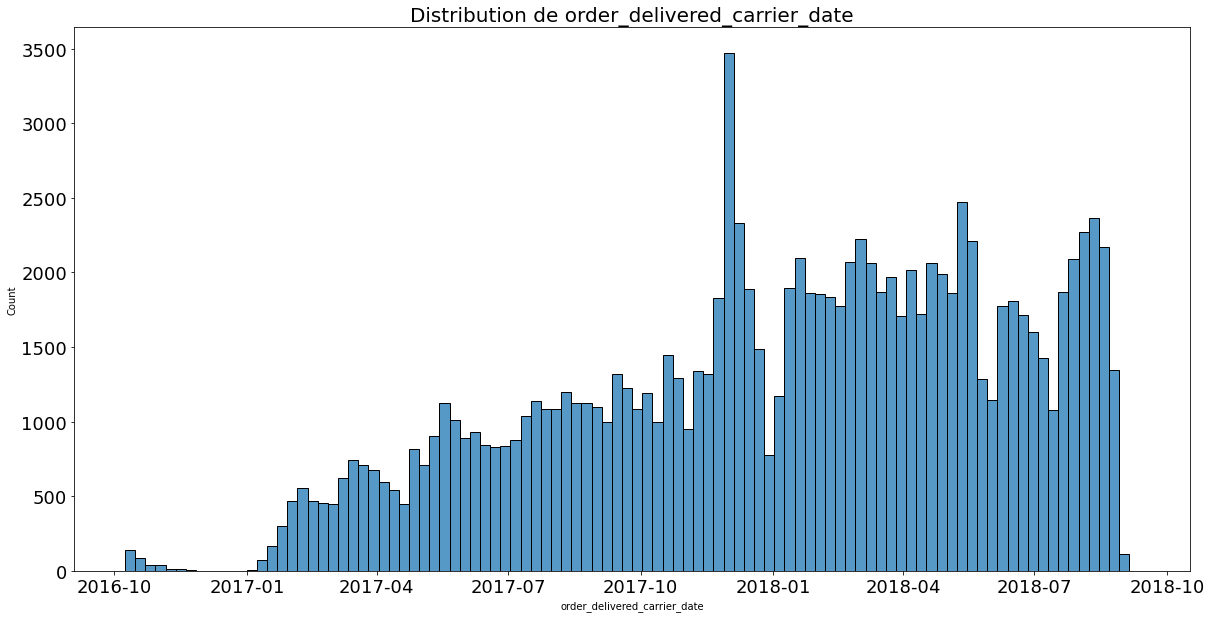

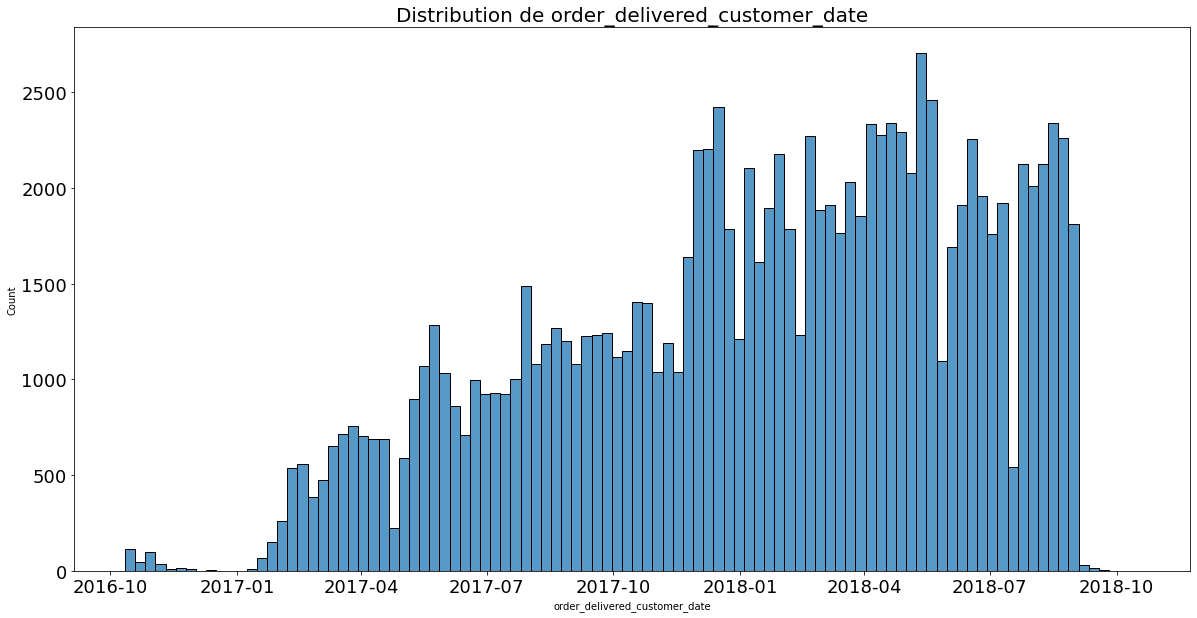

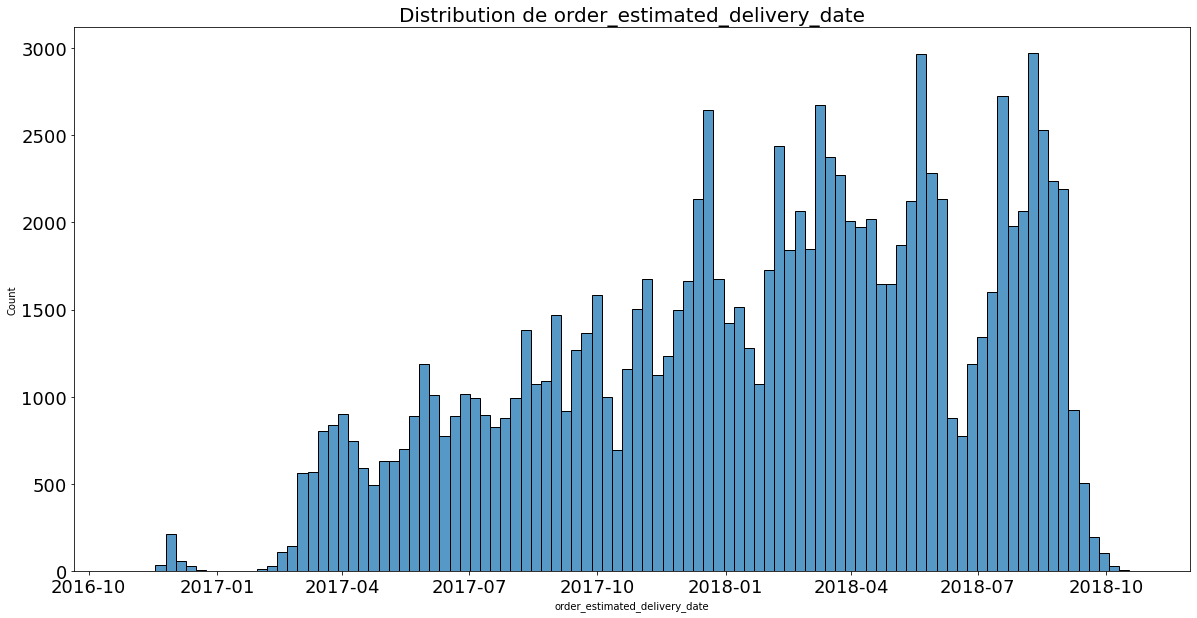

In [26]:
# Distribution des variables quantitatives

for n in range(data_merge_3_date.shape[1]):
    plt.figure(figsize=(20, 10))
    plot = sns.histplot(x=data_merge_3_date.iloc[:, n], bins=100)
    plt.title(f"Distribution de {data_merge_3_date.iloc[:, n].name}",
              fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig(f"{data_merge_3_date.iloc[:, n].name}_dist.png",
                bbox_inches='tight')
    plt.show()

## Analyse bi-variée avec customer_unique_id

In [35]:
# ANOVA

def eta_squared(x, y):
    """Calcul de eta² entre x serie variable quantitative
    et y serie variable qualitative"""
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2
               for c in classes])
    return SCE/SCT

In [36]:
# Construction d'une DF pour une heatmap de eta²
df_eta = pd.DataFrame({'None' : [0 for x in range(len(cat))]}, 
                      index=data_merge_3_cat.columns)
for col in data_merge_3_quant.columns:
    list_eta = [eta_squared(data_merge_3_cat.dropna()[col1], 
                            data_merge_3_quant.dropna()[col]) 
                for col1 in data_merge_3_cat.columns]
    df_eta[col] = list_eta

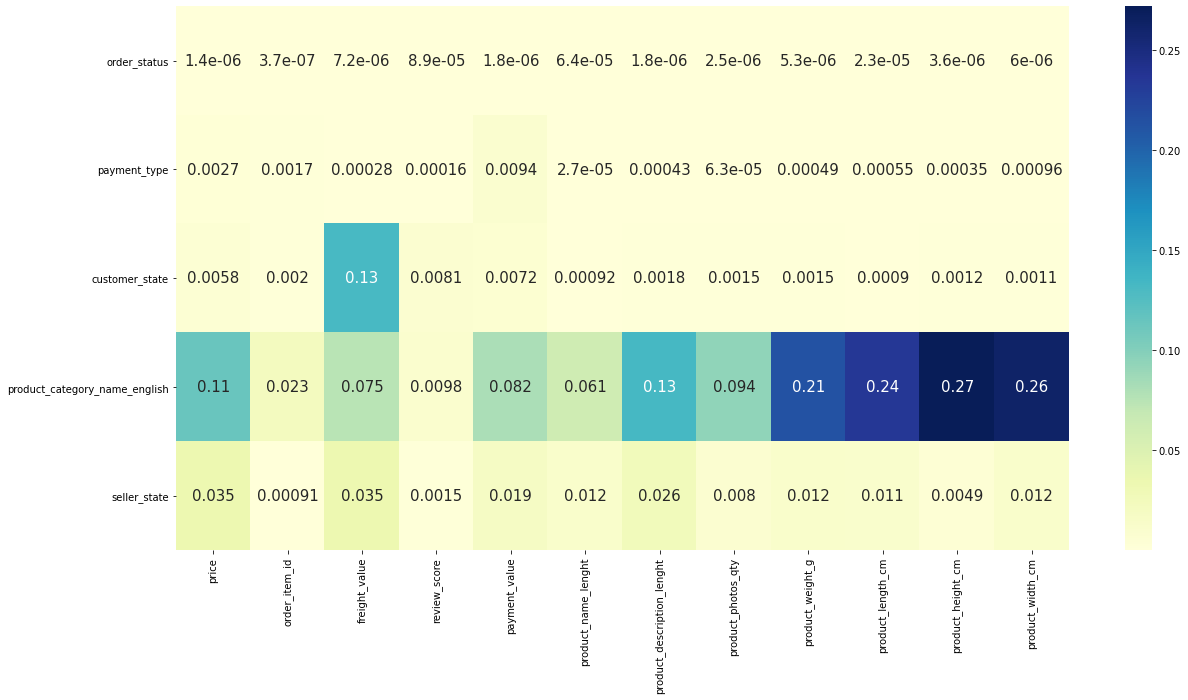

In [38]:
# Heatmap eta²
plt.figure(figsize=(20, 10))
plot = sns.heatmap(df_eta.drop(columns=['None']),
                   annot=True,  cmap="YlGnBu",
                   annot_kws={"fontsize":15})
plot.set_yticklabels(plot.get_yticklabels(),
                     rotation=0, ha="right")
plt.savefig(f"eta2_table.png",
            bbox_inches='tight')
plt.show()

In [40]:
from scipy.stats import chi2_contingency

for col1 in data_merge_3_cat_cus.columns:
    for col2 in data_merge_3_cat_cus.columns:
        if col1 != col2:
            tab = pd.crosstab(data_merge_3[col1], data_merge_3[col2])
            tab.loc['Total', :] = tab.sum()
            tab.loc[:, 'Total'] = tab.sum(axis=1)
            chi2, p, dof, ex = chi2_contingency(tab)
            display(f"Pour {col1} et {col2}, on a chi2 = {chi2} pour p = {p}")

'Pour order_status et payment_type, on a chi2 = 2.484898035641868 pour p = 0.962431453037089'

'Pour order_status et customer_state, on a chi2 = 9.430030767678321 pour p = 0.9999999999984904'

'Pour order_status et product_category_name_english, on a chi2 = 31.625713628358042 pour p = 1.0'

'Pour order_status et seller_state, on a chi2 = 49.759712824944806 pour p = 0.2547956895583461'

'Pour order_status et customer_unique_id, on a chi2 = 114050.00000000003 pour p = 1.0'

'Pour payment_type et order_status, on a chi2 = 2.484898035641868 pour p = 0.962431453037089'

'Pour payment_type et customer_state, on a chi2 = 594.4445897437209 pour p = 2.7880502245380636e-68'

'Pour payment_type et product_category_name_english, on a chi2 = 1423.91469822079 pour p = 6.519239800561511e-151'

'Pour payment_type et seller_state, on a chi2 = 234.8710347568544 pour p = 2.5907568483293453e-15'

'Pour payment_type et customer_unique_id, on a chi2 = 312067.3339730558 pour p = 1.0'

'Pour customer_state et order_status, on a chi2 = 9.430030767678321 pour p = 0.9999999999984904'

'Pour customer_state et payment_type, on a chi2 = 594.4445897437208 pour p = 2.7880502245382226e-68'

'Pour customer_state et product_category_name_english, on a chi2 = 5858.763366892812 pour p = 0.0'

'Pour customer_state et seller_state, on a chi2 = 7813.279550523734 pour p = 0.0'

'Pour customer_state et customer_unique_id, on a chi2 = 2962755.482284722 pour p = 0.0'

'Pour product_category_name_english et order_status, on a chi2 = 31.625713628358042 pour p = 1.0'

'Pour product_category_name_english et payment_type, on a chi2 = 1423.9146982207901 pour p = 6.519239800560769e-151'

'Pour product_category_name_english et customer_state, on a chi2 = 5858.763366892811 pour p = 0.0'

'Pour product_category_name_english et seller_state, on a chi2 = 80082.30395662607 pour p = 0.0'

'Pour product_category_name_english et customer_unique_id, on a chi2 = 7695921.337161474 pour p = 0.0'

'Pour seller_state et order_status, on a chi2 = 49.75971282494482 pour p = 0.2547956895583456'

'Pour seller_state et payment_type, on a chi2 = 234.8710347568544 pour p = 2.5907568483293453e-15'

'Pour seller_state et customer_state, on a chi2 = 7813.2795505237345 pour p = 0.0'

'Pour seller_state et product_category_name_english, on a chi2 = 80082.30395662607 pour p = 0.0'

'Pour seller_state et customer_unique_id, on a chi2 = 2309950.5379901608 pour p = 0.0'

'Pour customer_unique_id et order_status, on a chi2 = 114050.00000000003 pour p = 1.0'

'Pour customer_unique_id et payment_type, on a chi2 = 312067.3339730558 pour p = 1.0'

'Pour customer_unique_id et customer_state, on a chi2 = 2962755.482284721 pour p = 0.0'

'Pour customer_unique_id et product_category_name_english, on a chi2 = 7695921.337161491 pour p = 0.0'

'Pour customer_unique_id et seller_state, on a chi2 = 2309950.5379901626 pour p = 0.0'

## Aggrégations du dataframe et créations de nouvelles features

In [10]:
# Nettoyage avant aggrégation
lim_inf_date = '2016-12-31 23:59:59'
lim_sup_date = '2018-07-01 00:00:00'
# Suppression de l'année 2016
data_merge_4 = data_merge_3[data_merge_3['order_purchase_timestamp']
                            > lim_inf_date]
data_merge_4 = data_merge_4[data_merge_4['order_purchase_timestamp']
                            < lim_sup_date]

# Suppression des status canceled
data_merge_4 = data_merge_4[data_merge_4['order_status'] != 'canceled']

In [13]:
# Dataframe à aggréger
col_1 = ['order_id', 'order_item_id', 'customer_unique_id',
         'price', 'freight_value',
         'payment_type', 'review_score',
         'review_comment_message', 'order_purchase_timestamp',
         'order_delivered_customer_date', 'order_delivered_carrier_date',
         'customer_city', 'customer_state',
         'seller_city', 'seller_state',
         'product_category_name_english',
         'product_weight_g', 'product_length_cm', 'product_height_cm',
         'product_width_cm']

data_to_agg = data_merge_4[col_1].copy()

In [14]:
# Création d'une variable unique pour chaque produit pour chaque commande
# (abstraction des facilités de paiements)

data_to_agg['drop_order'] = (data_to_agg['order_id']
                             + data_to_agg['order_item_id'].astype('str'))


# Calcul des modes de paiements le plus utilisées dans la commande
data_to_agg['most_payment_type'] = data_to_agg['payment_type']


def most(X):
    """Donne le mode"""
    from scipy.stats import mode
    md = mode(X, axis=None)
    return md[0][0]


A = data_to_agg['drop_order'].value_counts()
for od in A[A != 1].index:
    data_1 = data_to_agg[data_to_agg['drop_order'] == od].loc[:, 'most_payment_type']
    most_paiment_type = most(data_1)
    old_values = data_1.values
    data_1.replace(old_values, most_paiment_type)
    data_to_agg[data_to_agg['drop_order'] == od].loc[:, 'most_payment_type'] = data_1

# Suppression des doublons (les différents facilités de paiements)
data_to_agg = data_to_agg.drop_duplicates(subset=['drop_order'])

C:\Users\ilyas\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
# Création de features

# Présence ou non de message
index_nan = data_to_agg[data_to_agg['review_comment_message'].isna() == True].index
data_to_agg['review_comment'] = [0 for x in range(data_to_agg.shape[0])]
data_to_agg.loc[index_nan, 'review_comment'] = [1 for x in range(len(index_nan))]

# Nombre de commandes
data_to_agg['order_qty'] = data_to_agg['order_id'].copy()

# Date du dernier achat
data_to_agg['last_order_date'] = data_to_agg['order_purchase_timestamp'].copy()

# Date du premier achat
data_to_agg['first_order_date'] = data_to_agg['order_purchase_timestamp'].copy()

# Panier moyen prix
data_to_agg['basket_price_mean'] = data_to_agg['price'].copy()

# Montant total des achats
data_to_agg['sum_paiyed_price'] = data_to_agg['price'].copy()

# Montant total des fraix de port
data_to_agg['sum_freight_value'] = data_to_agg['freight_value'].copy()

# Panier moyen nombre de produit
data_to_agg['basket_product_mean'] = data_to_agg['order_item_id'].copy()

# Total nombre de produit acheté
data_to_agg['sum_ordered_product'] = data_to_agg['order_item_id'].copy()

# Volume de produit
data_to_agg['product_volume'] = (data_to_agg['product_length_cm'] 
                                 * data_to_agg['product_height_cm'] * data_to_agg['product_width_cm']).copy()
# Délai moyen de livraison
data_to_agg['delivery_mean_time'] = (data_to_agg['order_delivered_customer_date'] 
                                     - data_to_agg['order_purchase_timestamp']).dt.total_seconds() / (60*60*24)

# Création of new categories in product category
product_new_name = {'construction_tools_construction': 'construction',
                    'construction_tools_lights': 'construction',
                    'construction_tools_safety': 'construction',
                    'costruction_tools_garden': 'construction',
                    'costruction_tools_tools': 'construction',
                    'home_construction': 'construction',
                    
                    'fashio_female_clothing': 'fashion',
                    'fashion_bags_accessories': 'fashion',
                    'fashion_childrens_clothes': 'fashion',
                    'fashion_male_clothing': 'fashion',
                    'fashion_shoes': 'fashion',
                    'fashion_sport': 'fashion',
                    
                    'fashion_underwear_beach': 'fashion',
                    
                    'furniture_bedroom': 'furniture',
                    'furniture_decor': 'furniture',
                    'furniture_living_room': 'furniture',
                    'furniture_mattress_and_upholstery': 'furniture',
                    'kitchen_dining_laundry_garden_furniture': 'furniture',
                    'office_furniture': 'furniture',
                    
                    'air_conditioning': 'home',
                    'home_appliances': 'home',
                    
                    'home_appliances_2': 'home',
                    'home_comfort_2': 'home',
                    'home_confort': 'home',
                    'housewares': 'home',
                    'garden_tools': 'home',
                    'flowers': 'home',
                    
                    'drinks': 'food_drink',
                    'food': 'food_drink',
                    'food_drink': 'food_drink',
                    'cool_stuff': 'food_drink',
                    'la_cuisine': 'food_drink',
                    
                    'electronics': 'electronics',
                    'audio': 'electronics',
                    'tablets_printing_image': 'electronics',
                    'telephony': 'electronics',
                    'fixed_telephony': 'electronics',
                    'small_appliances': 'electronics',
                    'small_appliances_home_oven_and_coffee': 'electronics',
                    'computers_accessories': 'electronics',
                    'computers': 'electronics',    
                    'consoles_games': 'electronics',
                    
                    'sports_leisure': 'leisure',
                    'musical_instruments': 'leisure',
                    'cine_photo': 'leisure',
                    'dvds_blu_ray': 'leisure',
                    'cds_dvds_musicals': 'leisure',
                    'music': 'leisure',
                    'books_general_interest': 'leisure',
                    'books_imported': 'leisure',
                    'books_technical': 'leisure',
                    'art': 'home',
                    
                    'arts_and_craftmanship': 'leisure',
                    
                    'toys': 'kids',
                    'bed_bath_table': 'kids',
                    'baby': 'kids',
                                        
                    'health_beauty': 'health_beauty',
                    'perfumery': 'health_beauty',
                    'diapers_and_hygiene': 'health_beauty',
                    
                    'christmas_supplies': 'supplies',
                    'party_supplies': 'supplies',
                    'luggage_accessories': 'supplies',
                    'stationery': 'supplies',
                    'auto': 'supplies', 
                    
                    'agro_industry_and_commerce': 'misc',
                    'industry_commerce_and_business': 'misc',
                    'security_and_services': 'misc',
                    'signaling_and_security': 'misc',
                    'market_place': 'misc',
                    'pet_shop': 'misc',
                    'watches_gifts': 'misc'}
data_to_agg['product_category_new'] = (data_to_agg['product_category_name_english']
                                       .replace(product_new_name))

In [16]:
# Enregistrement du dataset en format .csv
data_to_agg.to_csv('to_aggregate_data.csv', index = False)

In [46]:
# Dataframes agréger selon customer_unique_id et order_id
col_2 = ['customer_unique_id', 'order_id', 'basket_price_mean',
         'delivery_mean_time', 'basket_product_mean', 'sum_ordered_product',
         'freight_value']

data_agg_1 = pd.pivot_table(data_to_agg[col_2],
                            index=['customer_unique_id', 'order_id'],
                            aggfunc={'basket_price_mean': np.sum,
                                     'delivery_mean_time': np.max,
                                     'basket_product_mean': np.max,
                                     'sum_ordered_product': np.max,
                                     'freight_value': np.sum})

# Création du ratio basket_price et basket_product_qty
A = data_agg_1['basket_price_mean'] / data_agg_1['basket_product_mean']
data_agg_1['mean_ratio_basket_price_product_qty'] = A
data_agg_1['mean_basket_paiyed'] = (data_agg_1['basket_price_mean']
                                    + data_agg_1['freight_value'])

# Aggrégation selon les identifiants clients
aggfunc_2 = {'basket_price_mean': np.mean,
             'delivery_mean_time': np.mean,
             'basket_product_mean': np.mean,
             'sum_ordered_product': np.sum,
             'mean_ratio_basket_price_product_qty': np.mean,
             'mean_basket_paiyed': np.mean}
data_agg_2 = pd.pivot_table(data_agg_1, index=['customer_unique_id'],
                            aggfunc=aggfunc_2)
data_agg_2

,basket_price_mean,basket_product_mean,delivery_mean_time,mean_basket_paiyed,mean_ratio_basket_price_product_qty,sum_ordered_product
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,6.411227,141.90,129.90,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,3.285590,27.19,18.90,1.0
0000f46a3911fa3c0805444483337064,69.00,1.0,25.731759,86.22,69.00,1.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,20.037083,43.62,25.99,1.0
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,13.141134,196.89,180.00,1.0
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,2.0,27.514861,2067.42,785.00,2.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,30.097500,84.58,64.89,1.0
ffff371b4d645b6ecea244b27531430a,89.90,1.0,14.872083,112.46,89.90,1.0


In [47]:
# Dataframes agrégeant les autres variables
def most(X):
    """Calcul du mode"""
    from scipy.stats import mode
    md = mode(X, axis=None)
    return md[0][0]


col_3 = ['price', 'freight_value',
         'customer_unique_id', 'order_qty',
         'most_payment_type',
         'review_score', 'review_comment',
         'last_order_date', 'first_order_date',
         'customer_city', 'customer_state',
         'sum_paiyed_price', 'sum_freight_value',
         'seller_city', 'seller_state',
         'product_category_name_english', 'product_category_new',
         'product_weight_g', 'product_volume']
data_agg_3 = pd.pivot_table(data_to_agg[col_3], index=['customer_unique_id'],
                            aggfunc={'price': np.mean,
                                     'sum_paiyed_price': np.sum,
                                     'freight_value': np.mean,
                                     'sum_freight_value': np.sum,
                                     'order_qty': len,
                                     'most_payment_type': most,
                                     'review_score': np.mean,
                                     'review_comment': np.mean,
                                     'last_order_date': np.max,
                                     'first_order_date': np.min,
                                     'customer_city': most,
                                     'customer_state': most,
                                     'seller_city': most,
                                     'seller_state': most,
                                     'product_category_name_english': most,
                                     'product_category_new': most,
                                     'product_weight_g': np.mean,
                                     'product_volume': np.mean})
data_agg_3

,customer_city,customer_state,first_order_date,freight_value,last_order_date,most_payment_type,order_qty,price,product_category_name_english,product_category_new,product_volume,product_weight_g,review_comment,review_score,seller_city,seller_state,sum_freight_value,sum_paiyed_price
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,2018-05-10 10:56:27,12.00,2018-05-10 10:56:27,credit_card,1,129.90,bed_bath_table,kids,7616.0,1500.0,0.0,5.0,piracicaba,SP,12.00,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,2018-05-07 11:11:27,8.29,2018-05-07 11:11:27,credit_card,1,18.90,health_beauty,health_beauty,5148.0,375.0,1.0,4.0,sao paulo,SP,8.29,18.90
0000f46a3911fa3c0805444483337064,sao jose,SC,2017-03-10 21:05:03,17.22,2017-03-10 21:05:03,credit_card,1,69.00,stationery,supplies,43750.0,1500.0,1.0,3.0,campo limpo paulista,SP,17.22,69.00
0000f6ccb0745a6a4b88665a16c9f078,belem,PA,2017-10-12 20:29:41,17.63,2017-10-12 20:29:41,credit_card,1,25.99,telephony,electronics,1045.0,150.0,0.0,4.0,sao paulo,SP,17.63,25.99
0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,2017-11-14 19:45:42,16.89,2017-11-14 19:45:42,credit_card,1,180.00,telephony,electronics,528.0,6050.0,1.0,5.0,jacarei,SP,16.89,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,2017-06-08 21:00:36,248.71,2017-06-08 21:00:36,credit_card,2,785.00,health_beauty,health_beauty,251625.0,30000.0,1.0,5.0,sao paulo,SP,497.42,1570.00
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,2017-12-10 20:07:56,19.69,2017-12-10 20:07:56,credit_card,1,64.89,baby,kids,32076.0,1720.0,1.0,4.0,laranjal paulista,SP,19.69,64.89
ffff371b4d645b6ecea244b27531430a,sinop,MT,2017-02-07 15:49:16,22.56,2017-02-07 15:49:16,credit_card,1,89.90,auto,supplies,3315.0,600.0,1.0,5.0,belo horizonte,MG,22.56,89.90


In [48]:
# Concaténation des data_agg2 et data_agg3

data_agg_4 = pd.concat([data_agg_2, data_agg_3], axis=1)
data_agg_4

,basket_price_mean,basket_product_mean,delivery_mean_time,mean_basket_paiyed,mean_ratio_basket_price_product_qty,sum_ordered_product,customer_city,customer_state,first_order_date,freight_value,last_order_date,most_payment_type,order_qty,price,product_category_name_english,product_category_new,product_volume,product_weight_g,review_comment,review_score,seller_city,seller_state,sum_freight_value,sum_paiyed_price
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,6.411227,141.90,129.90,1.0,cajamar,SP,2018-05-10 10:56:27,12.00,2018-05-10 10:56:27,credit_card,1,129.90,bed_bath_table,kids,7616.0,1500.0,0.0,5.0,piracicaba,SP,12.00,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,3.285590,27.19,18.90,1.0,osasco,SP,2018-05-07 11:11:27,8.29,2018-05-07 11:11:27,credit_card,1,18.90,health_beauty,health_beauty,5148.0,375.0,1.0,4.0,sao paulo,SP,8.29,18.90
0000f46a3911fa3c0805444483337064,69.00,1.0,25.731759,86.22,69.00,1.0,sao jose,SC,2017-03-10 21:05:03,17.22,2017-03-10 21:05:03,credit_card,1,69.00,stationery,supplies,43750.0,1500.0,1.0,3.0,campo limpo paulista,SP,17.22,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,20.037083,43.62,25.99,1.0,belem,PA,2017-10-12 20:29:41,17.63,2017-10-12 20:29:41,credit_card,1,25.99,telephony,electronics,1045.0,150.0,0.0,4.0,sao paulo,SP,17.63,25.99
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,13.141134,196.89,180.00,1.0,sorocaba,SP,2017-11-14 19:45:42,16.89,2017-11-14 19:45:42,credit_card,1,180.00,telephony,electronics,528.0,6050.0,1.0,5.0,jacarei,SP,16.89,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,2.0,27.514861,2067.42,785.00,2.0,sanharo,PE,2017-06-08 21:00:36,248.71,2017-06-08 21:00:36,credit_card,2,785.00,health_beauty,health_beauty,251625.0,30000.0,1.0,5.0,sao paulo,SP,497.42,1570.00
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,30.097500,84.58,64.89,1.0,feira de santana,BA,2017-12-10 20:07:56,19.69,2017-12-10 20:07:56,credit_card,1,64.89,baby,kids,32076.0,1720.0,1.0,4.0,laranjal paulista,SP,19.69,64.89
ffff371b4d645b6ecea244b27531430a,89.90,1.0,14.872083,112.46,89.90,1.0,sinop,MT,2017-02-07 15:49:16,22.56,2017-02-07 15:49:16,credit_card,1,89.90,auto,supplies,3315.0,600.0,1.0,5.0,belo horizonte,MG,22.56,89.90


In [49]:
# Création des variables recency et fréquency
from datetime import date

data_agg_4['data_lim_min'] = [lim_inf_date for x in range(data_agg_4.shape[0])]
data_agg_4['data_lim_max'] = [lim_sup_date for x in range(data_agg_4.shape[0])]
data_agg_4['data_lim_min'] = pd.to_datetime(data_agg_4['data_lim_min'])
data_agg_4['data_lim_max'] = pd.to_datetime(data_agg_4['data_lim_max'])

# Calcul frequences
delta_years_1 = data_agg_4['data_lim_max'] - data_agg_4['data_lim_min']
delta_years = delta_years_1.dt.total_seconds() / (60*60*24*365)
data_agg_4['order_frequency_years'] = data_agg_4['order_qty'] / delta_years

# Calcul de recence
last_order_delta_1 = np.abs(data_agg_4['last_order_date']
                            - data_agg_4['data_lim_max'])
last_order_delta = last_order_delta_1.dt.total_seconds() / (60*60*24)
data_agg_4['order_recency_days'] = last_order_delta

In [50]:
# Création de variables de première date de commande
first_order_delta_1 = np.abs(data_agg_4['first_order_date']
                             - data_agg_4['data_lim_max'])
first_order_delta = first_order_delta_1.dt.total_seconds() / (60*60*24*365)
data_agg_4['first_order_delta_years'] = first_order_delta

In [51]:
# Rename de variables
replace_name = {'price': 'mean_product_price',
                'basket_price_mean': 'mean_basket_price',
                'delivery_mean_time': 'mean_delivery_time',
                'freight_value': 'mean_freight_value',
                'basket_product_mean': 'mean_basket_product',
                'review_comment': 'ratio_review_comment_order_qty',
                'product_weight_g': 'mean_product_weight',
                'product_volume': 'mean_product_volume'}
data_agg_4 = data_agg_4.rename(columns=replace_name)
data_agg_4

,mean_basket_price,mean_basket_product,mean_delivery_time,mean_basket_paiyed,mean_ratio_basket_price_product_qty,sum_ordered_product,customer_city,customer_state,first_order_date,mean_freight_value,last_order_date,most_payment_type,order_qty,mean_product_price,product_category_name_english,product_category_new,mean_product_volume,mean_product_weight,ratio_review_comment_order_qty,review_score,seller_city,seller_state,sum_freight_value,sum_paiyed_price,data_lim_min,data_lim_max,order_frequency_years,order_recency_days,first_order_delta_years
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,6.411227,141.90,129.90,1.0,cajamar,SP,2018-05-10 10:56:27,12.00,2018-05-10 10:56:27,credit_card,1,129.90,bed_bath_table,kids,7616.0,1500.0,0.0,5.0,piracicaba,SP,12.00,129.90,2016-12-31 23:59:59,2018-07-01,0.668498,51.544132,0.141217
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,3.285590,27.19,18.90,1.0,osasco,SP,2018-05-07 11:11:27,8.29,2018-05-07 11:11:27,credit_card,1,18.90,health_beauty,health_beauty,5148.0,375.0,1.0,4.0,sao paulo,SP,8.29,18.90,2016-12-31 23:59:59,2018-07-01,0.668498,54.533715,0.149407
0000f46a3911fa3c0805444483337064,69.00,1.0,25.731759,86.22,69.00,1.0,sao jose,SC,2017-03-10 21:05:03,17.22,2017-03-10 21:05:03,credit_card,1,69.00,stationery,supplies,43750.0,1500.0,1.0,3.0,campo limpo paulista,SP,17.22,69.00,2016-12-31 23:59:59,2018-07-01,0.668498,477.121493,1.307182
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,20.037083,43.62,25.99,1.0,belem,PA,2017-10-12 20:29:41,17.63,2017-10-12 20:29:41,credit_card,1,25.99,telephony,electronics,1045.0,150.0,0.0,4.0,sao paulo,SP,17.63,25.99,2016-12-31 23:59:59,2018-07-01,0.668498,261.146053,0.715469
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,13.141134,196.89,180.00,1.0,sorocaba,SP,2017-11-14 19:45:42,16.89,2017-11-14 19:45:42,credit_card,1,180.00,telephony,electronics,528.0,6050.0,1.0,5.0,jacarei,SP,16.89,180.00,2016-12-31 23:59:59,2018-07-01,0.668498,228.176597,0.625141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,2.0,27.514861,2067.42,785.00,2.0,sanharo,PE,2017-06-08 21:00:36,248.71,2017-06-08 21:00:36,credit_card,2,785.00,health_beauty,health_beauty,251625.0,30000.0,1.0,5.0,sao paulo,SP,497.42,1570.00,2016-12-31 23:59:59,2018-07-01,1.336996,387.124583,1.060615
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,30.097500,84.58,64.89,1.0,feira de santana,BA,2017-12-10 20:07:56,19.69,2017-12-10 20:07:56,credit_card,1,64.89,baby,kids,32076.0,1720.0,1.0,4.0,laranjal paulista,SP,19.69,64.89,2016-12-31 23:59:59,2018-07-01,0.668498,202.161157,0.553866
ffff371b4d645b6ecea244b27531430a,89.90,1.0,14.872083,112.46,89.90,1.0,sinop,MT,2017-02-07 15:49:16,22.56,2017-02-07 15:49:16,credit_card,1,89.90,auto,supplies,3315.0,600.0,1.0,5.0,belo horizonte,MG,22.56,89.90,2016-12-31 23:59:59,2018-07-01,0.668498,508.340787,1.392714


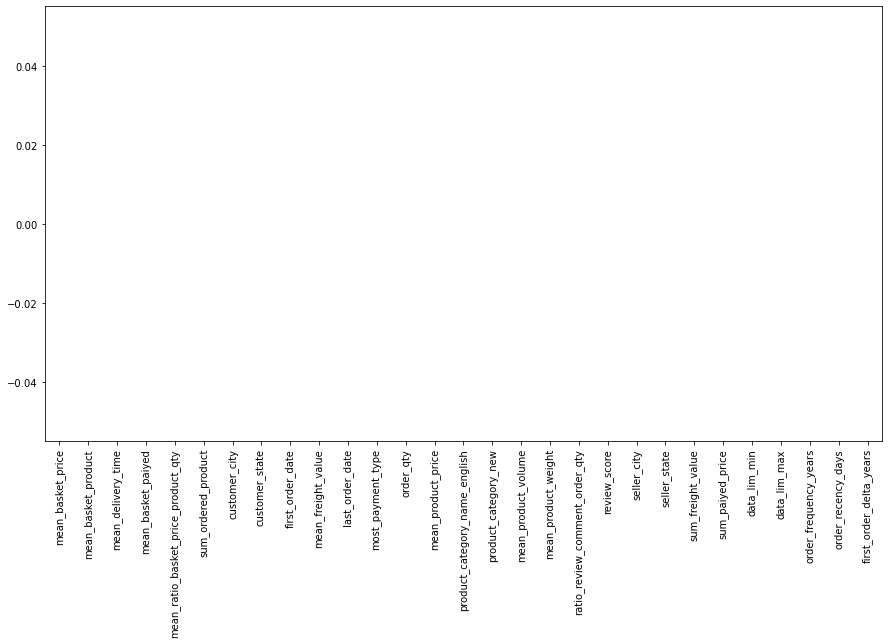

In [52]:
# Visualisation des NaN
remp_nan = (data_agg_4.isna().sum())/(data_agg_4.shape[0])
plt.figure(figsize=(15, 8))
remp_nan.plot.bar()
plt.show()

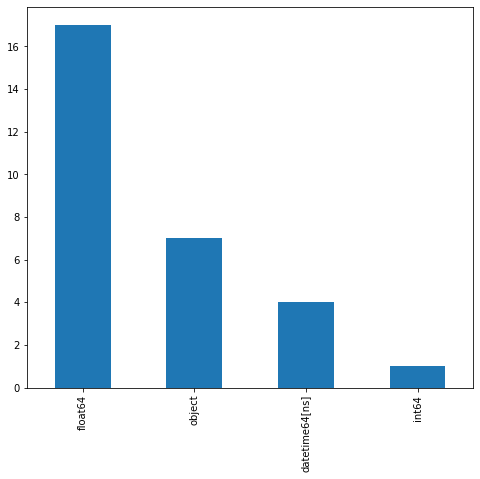

In [53]:
plt.figure(figsize=(8, 7))
data_agg_4.dtypes.value_counts().plot.bar()
plt.show()

In [54]:
# Enregistrement du dataset en .csv
data_agg_4.to_csv('aggregate_data.csv')

## Analyse Exploratoire

In [55]:
cat_var = ['most_payment_type',
           #'customer_city',
           'customer_state',
           #'first_order_date',
           #'last_order_date',
           'product_category_name_english',
           'product_category_new',
           #'seller_city',
           'seller_state']

quant_var = ['mean_basket_price',
             'sum_paiyed_price',
             'mean_basket_product',
             'sum_ordered_product',
             'mean_basket_paiyed',
             'mean_delivery_time',
             'mean_ratio_basket_price_product_qty',
             'mean_freight_value',
             'sum_freight_value',
             'order_qty',
             'mean_product_price',
             'mean_product_volume',
             'mean_product_weight',
             'ratio_review_comment_order_qty',
             'review_score',
             'order_frequency_years',
             'order_recency_days',
             'first_order_delta_years']

data_agg_cat = data_agg_4[cat_var]
data_agg_quant = data_agg_4[quant_var]

### Variables quantitatives

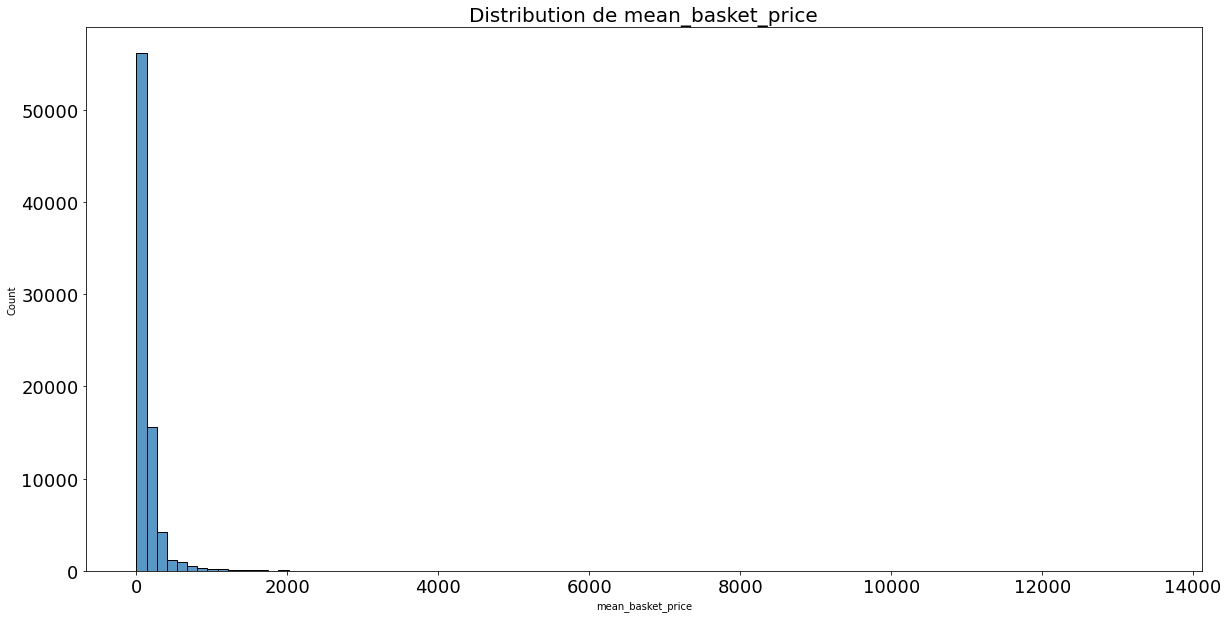

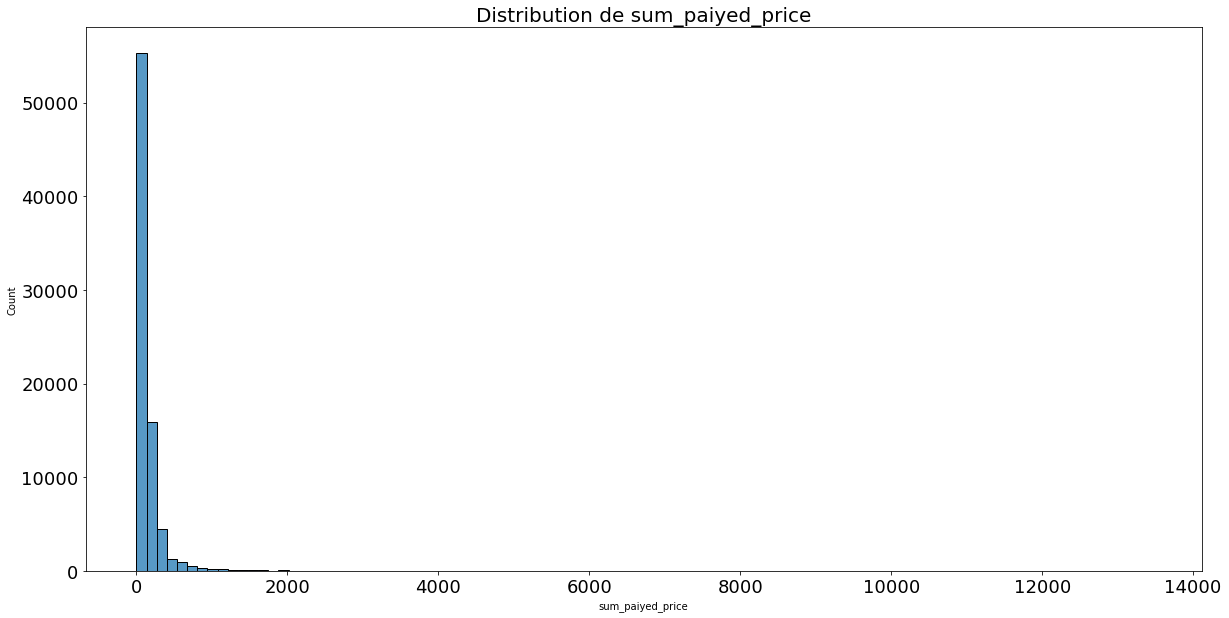

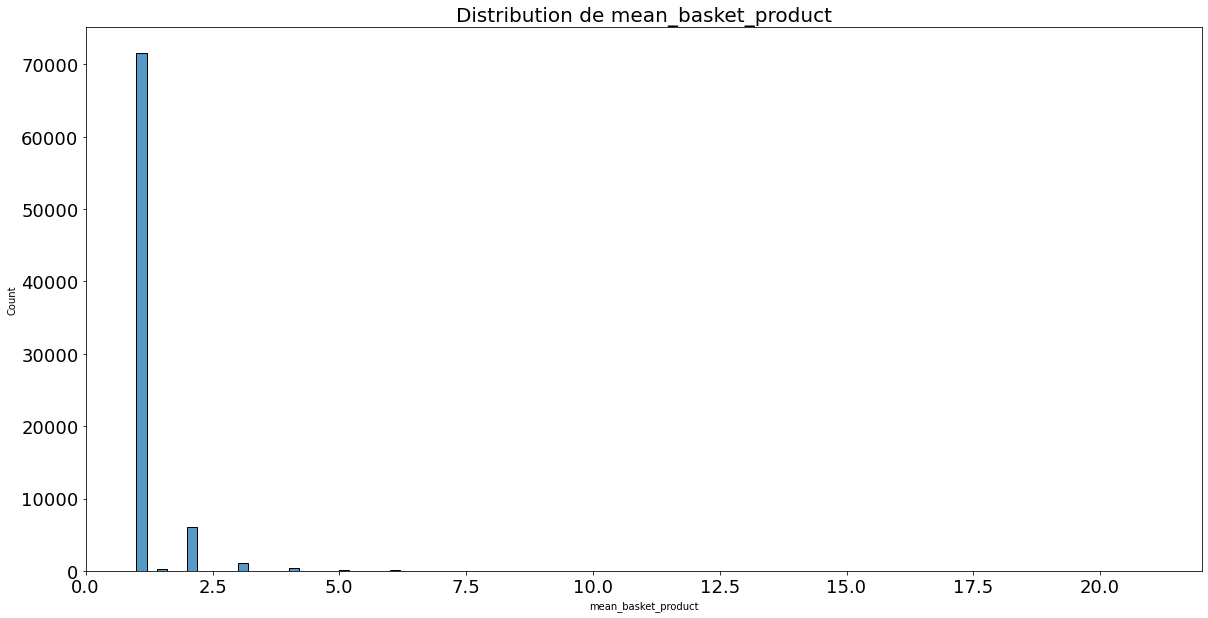

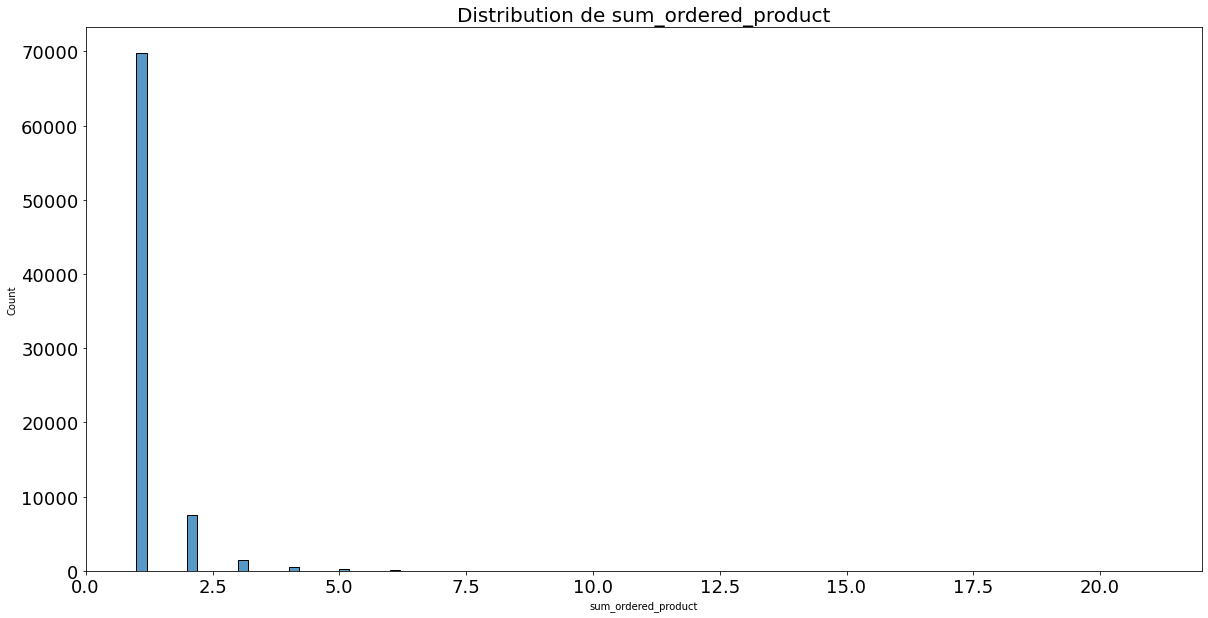

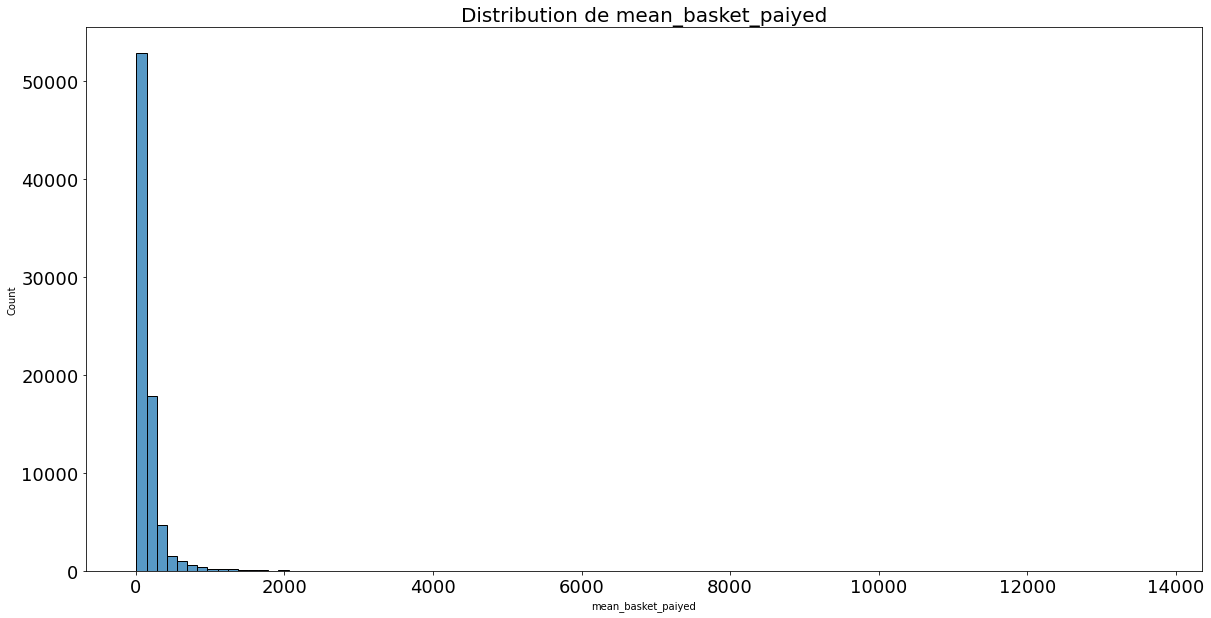

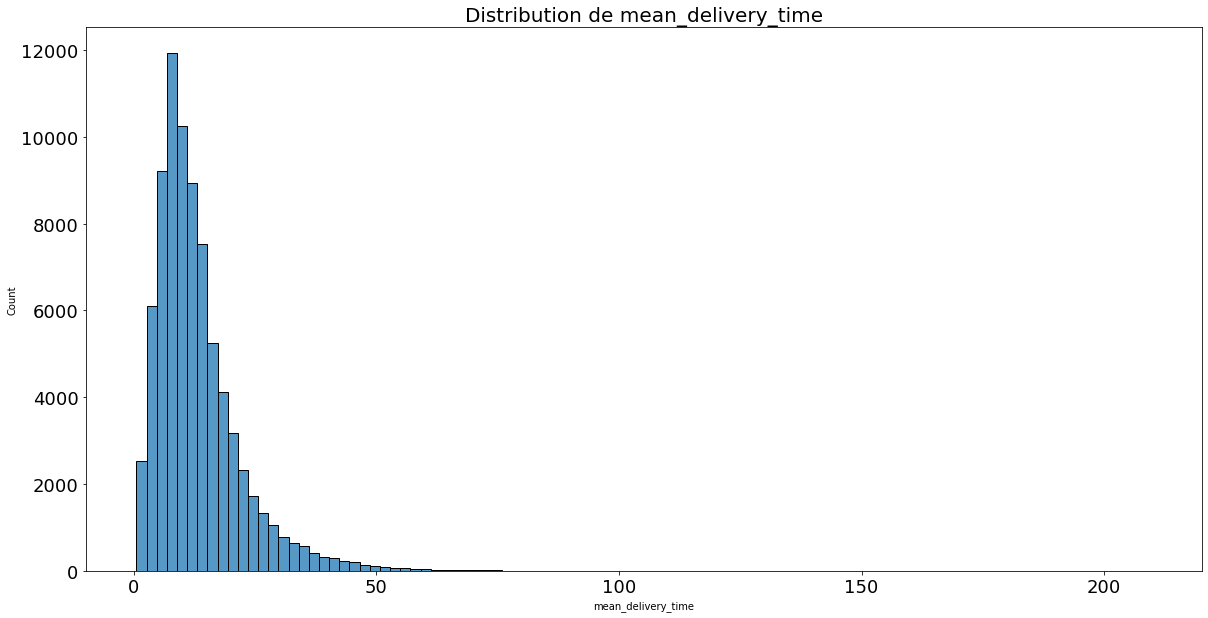

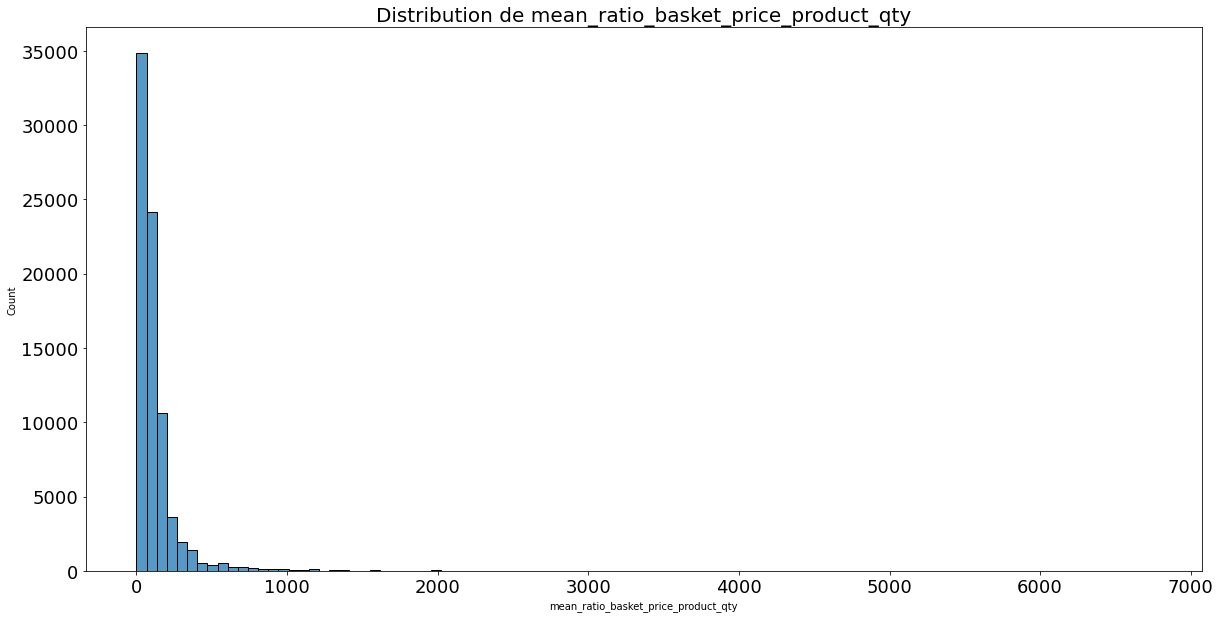

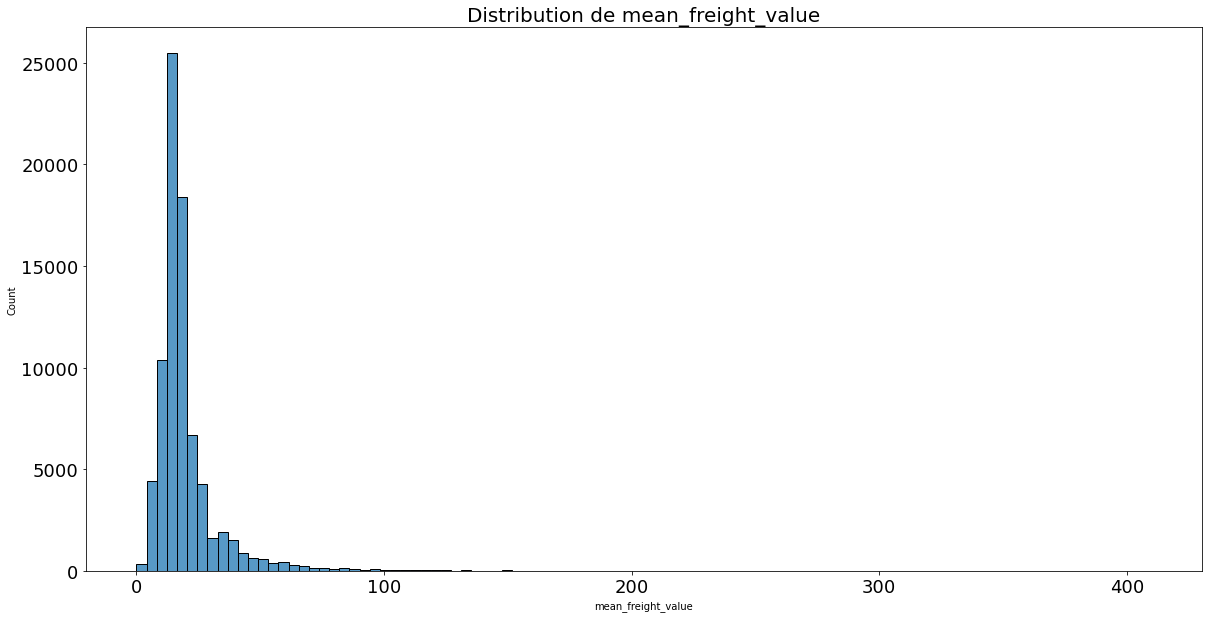

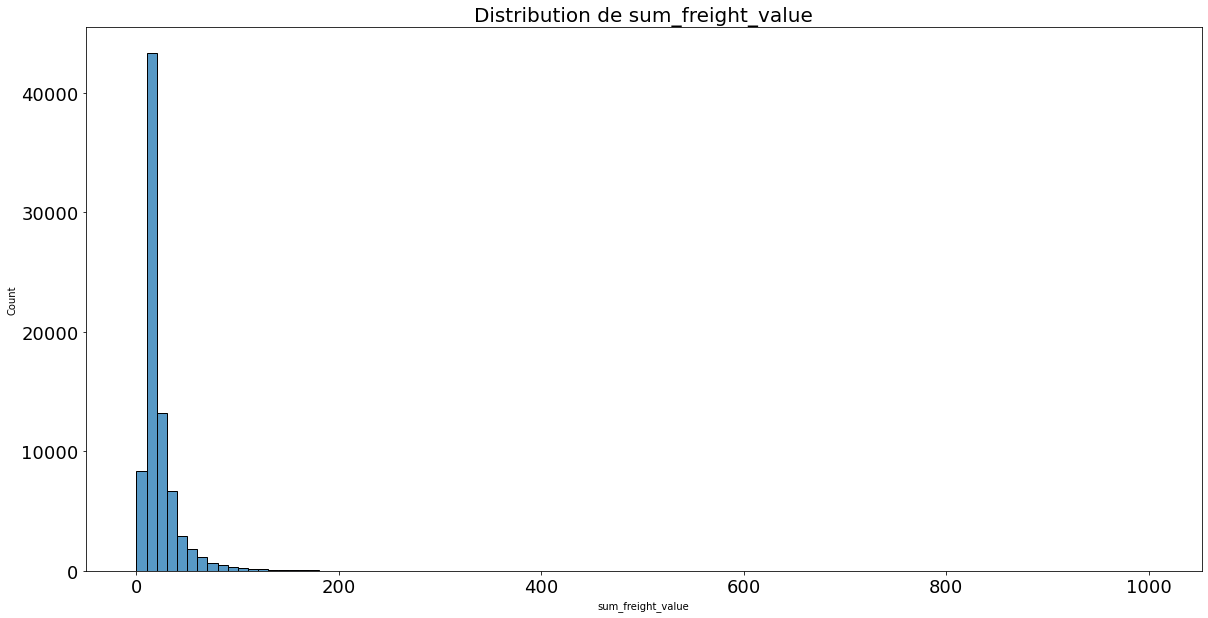

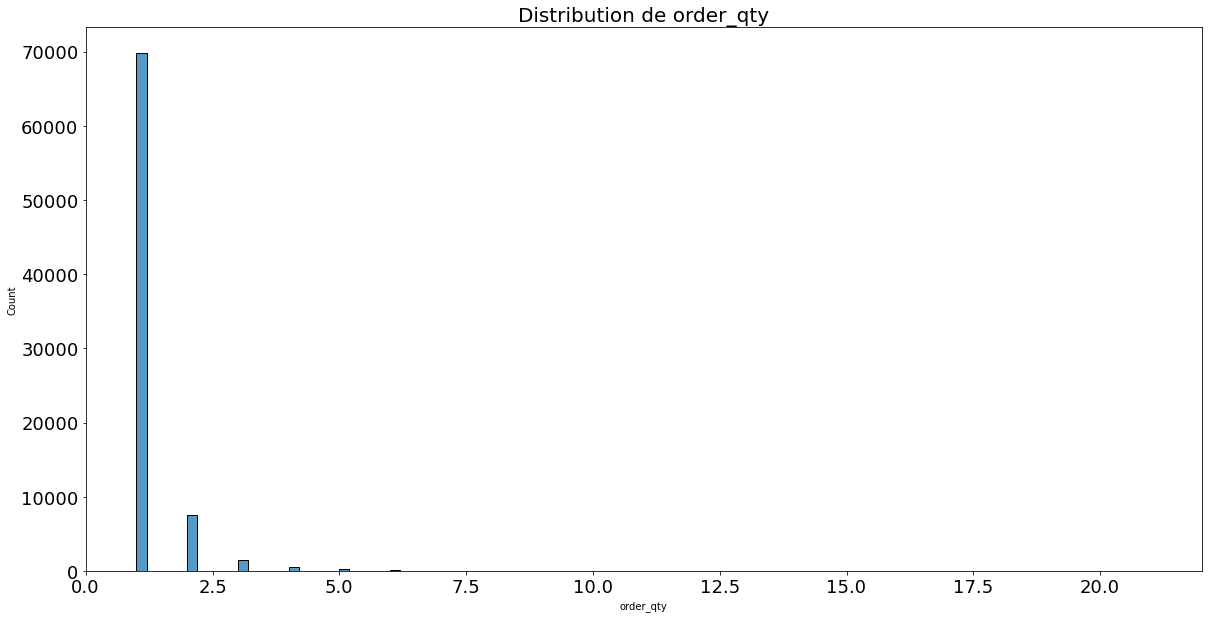

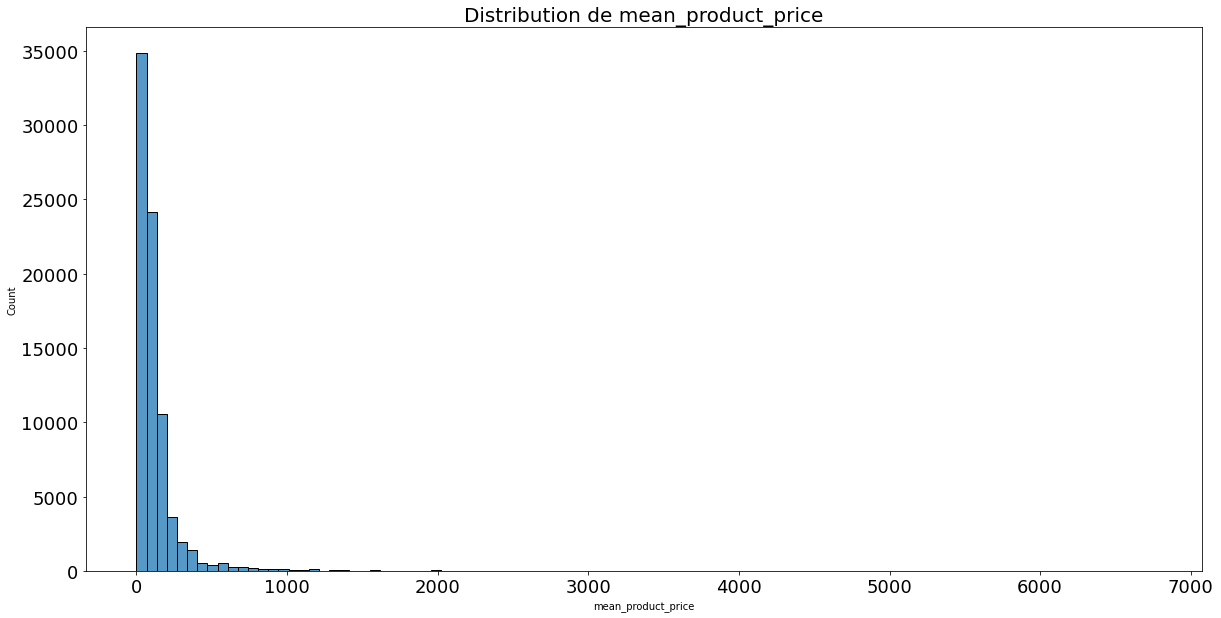

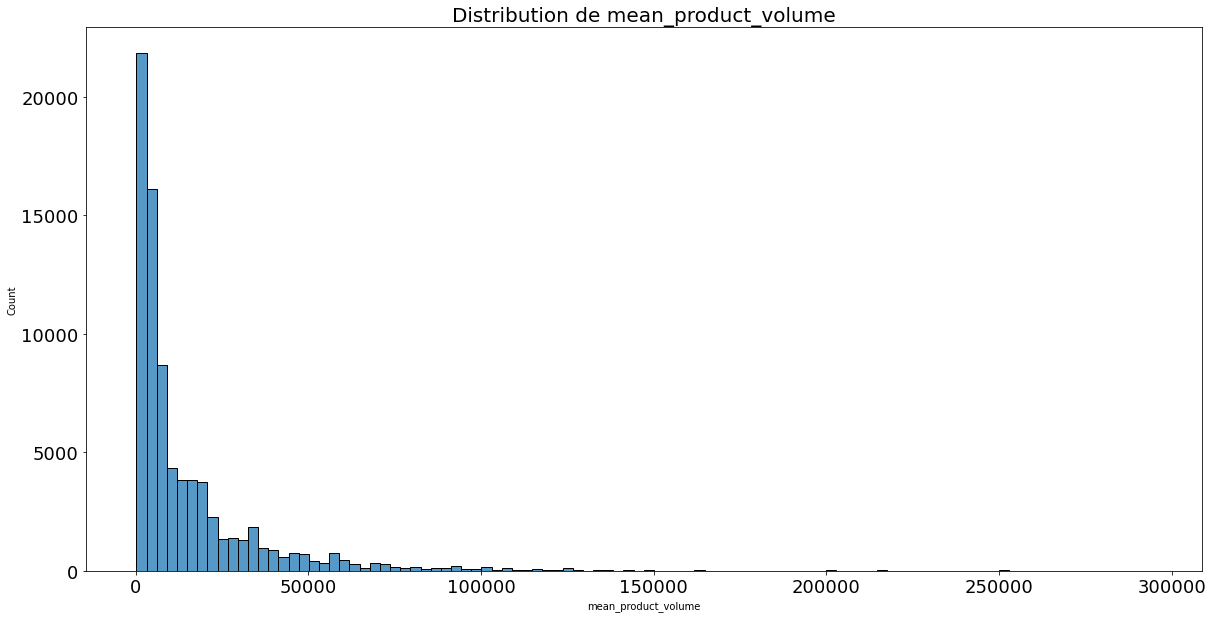

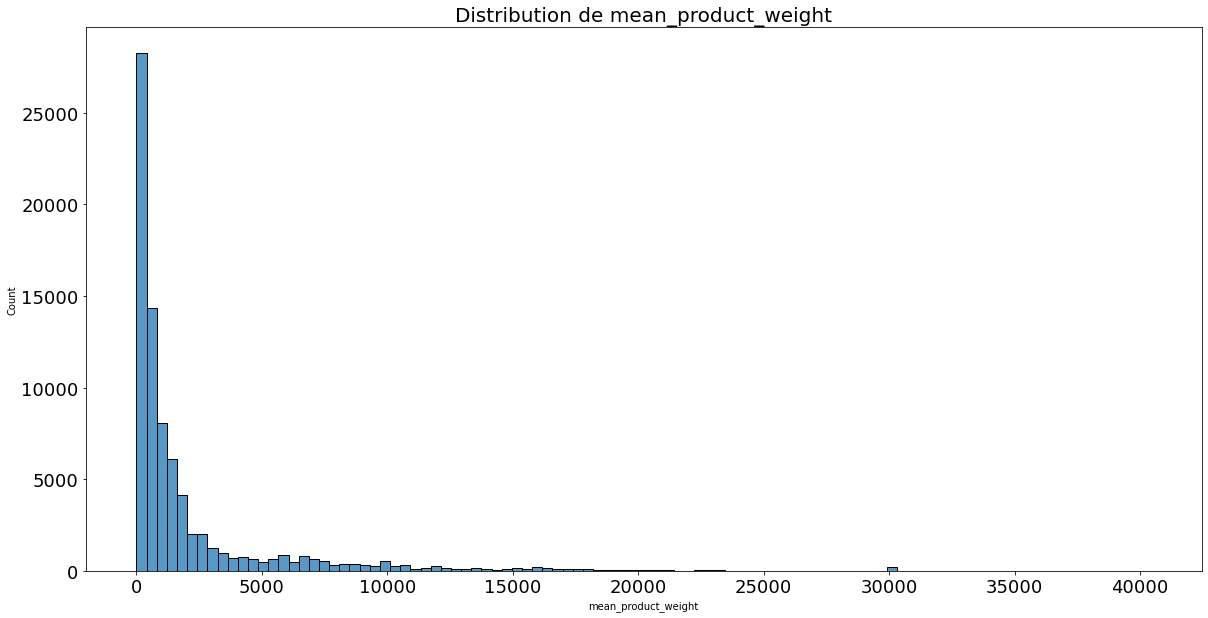

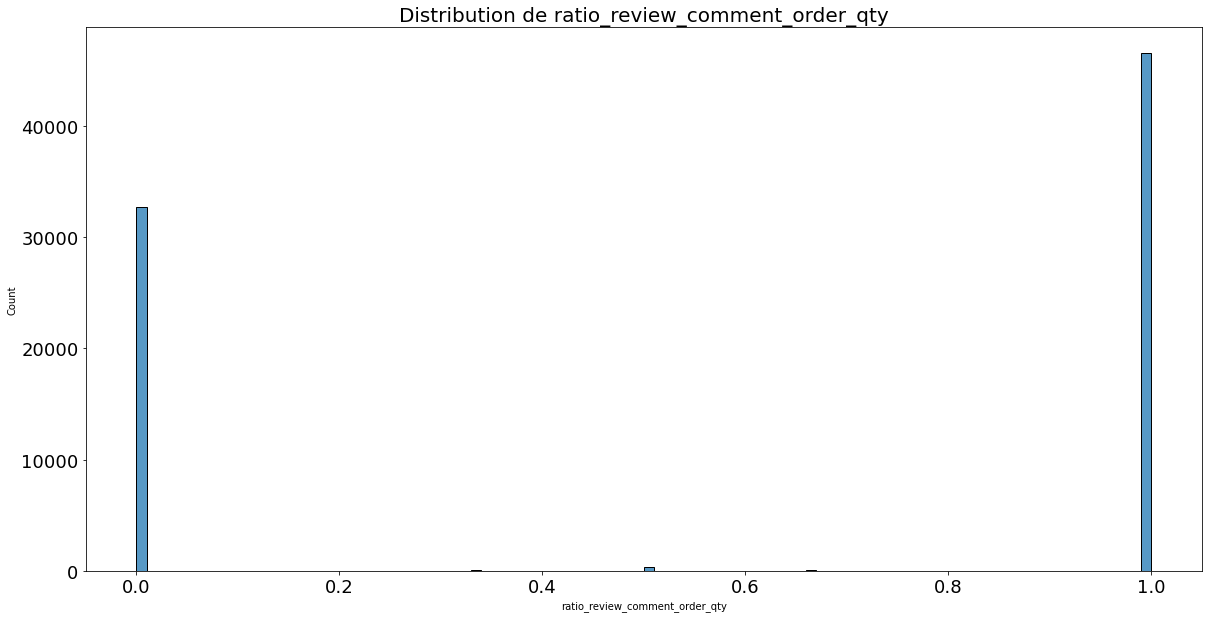

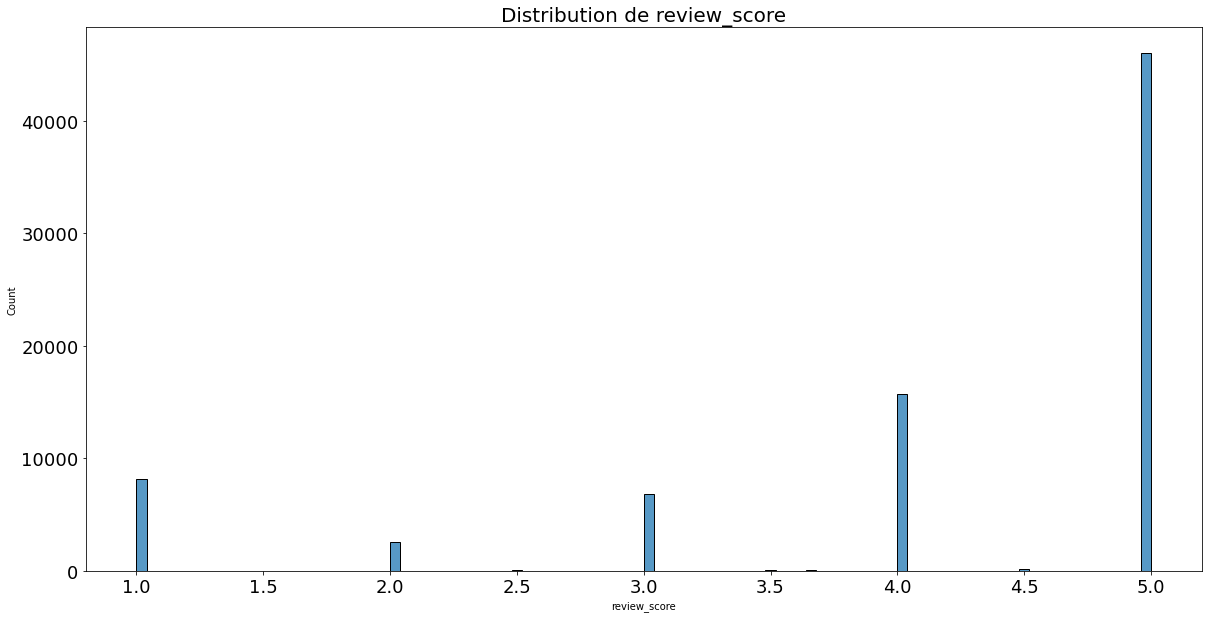

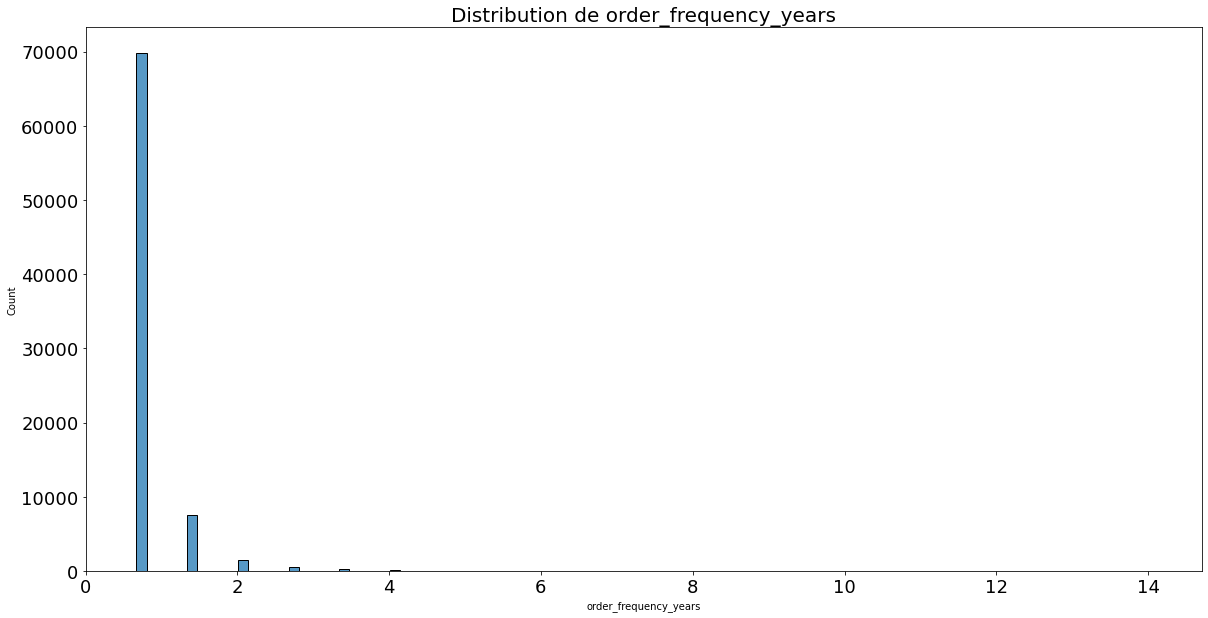

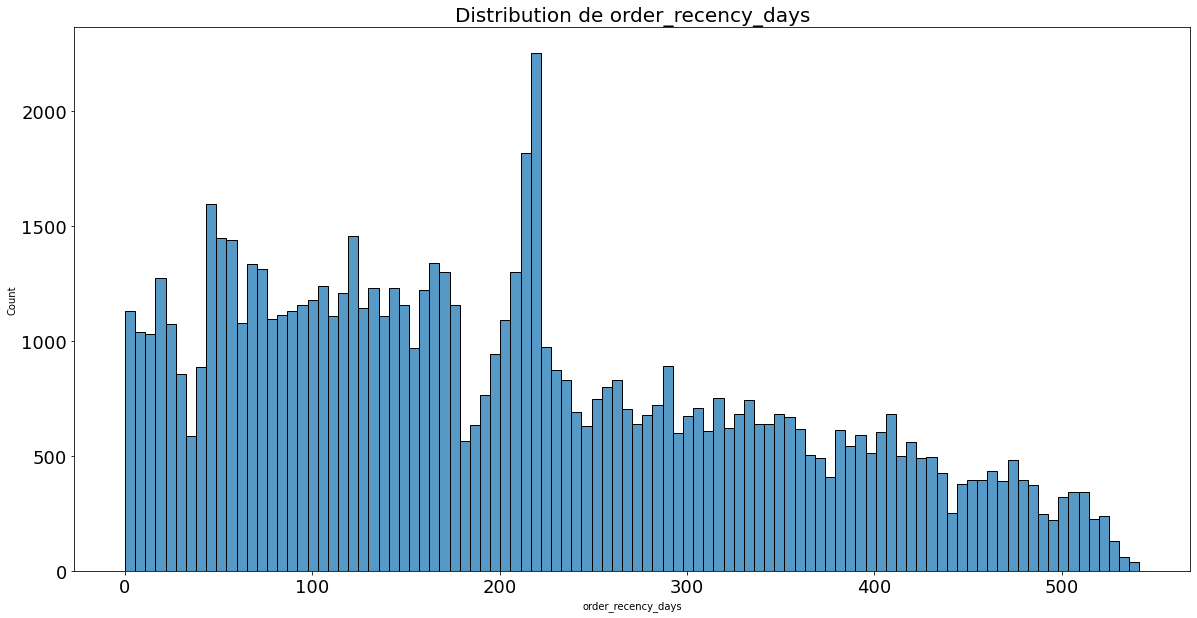

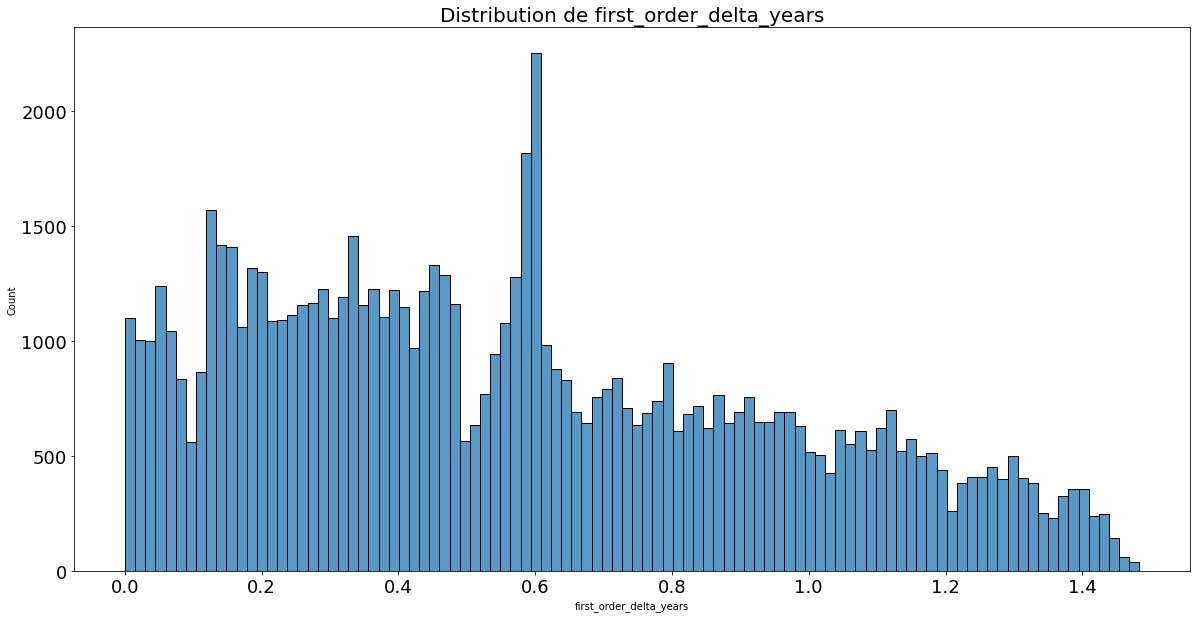

In [56]:
# Distribution des variables quantitatives

for n in range(data_agg_quant.shape[1]):
    plt.figure(figsize=(20, 10))
    plot = sns.histplot(x=data_agg_quant.iloc[:, n], bins=100)
    plt.title(f"Distribution de {data_agg_quant.iloc[:, n].name}",
              fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig(f"{data_agg_quant.iloc[:, n].name}_dist.png",
                bbox_inches='tight')
    plt.show()

In [57]:
data_agg_quant.describe()

,mean_basket_price,sum_paiyed_price,mean_basket_product,sum_ordered_product,mean_basket_paiyed,mean_delivery_time,mean_ratio_basket_price_product_qty,mean_freight_value,sum_freight_value,order_qty,mean_product_price,mean_product_volume,mean_product_weight,ratio_review_comment_order_qty,review_score,order_frequency_years,order_recency_days,first_order_delta_years
count,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,79784.000000,7.978400e+04
mean,137.629838,141.676574,1.142093,1.182267,160.187068,13.181516,125.796874,19.938374,23.305067,1.181816,125.769878,15563.506351,2157.480191,0.586601,4.117920,0.790042,207.588977,5.749978e-01
std,207.921205,213.680132,0.534349,0.622289,217.267361,9.855183,188.174205,15.163060,21.783016,0.621030,188.162660,23559.293434,3796.433245,0.490883,1.305574,0.415157,136.659082,3.755450e-01
min,0.850000,0.850000,1.000000,1.000000,10.070000,0.533414,0.850000,0.000000,0.000000,1.000000,0.850000,168.000000,2.000000,0.000000,1.000000,0.668498,0.000127,3.488077e-07
25%,46.452500,47.900000,1.000000,1.000000,62.387500,7.093388,42.900000,13.370000,14.100000,1.000000,42.900000,2873.000000,300.000000,0.000000,4.000000,0.668498,94.663079,2.643298e-01
50%,87.500000,89.800000,1.000000,1.000000,105.380000,10.960428,79.025000,16.250000,17.260000,1.000000,79.000000,6776.000000,700.000000,1.000000,5.000000,0.668498,190.284473,5.314154e-01
75%,149.900000,155.000000,1.000000,1.000000,176.870000,16.397410,139.900000,20.980000,25.400000,1.000000,139.900000,19040.000000,1850.000000,1.000000,5.000000,0.668498,307.025851,8.533127e-01
max,13440.000000,13440.000000,21.000000,21.000000,13664.080000,209.628611,6735.000000,409.680000,1002.290000,21.000000,6735.000000,294000.000000,40425.000000,1.000000,5.000000,14.038461,541.502708,1.483569e+00


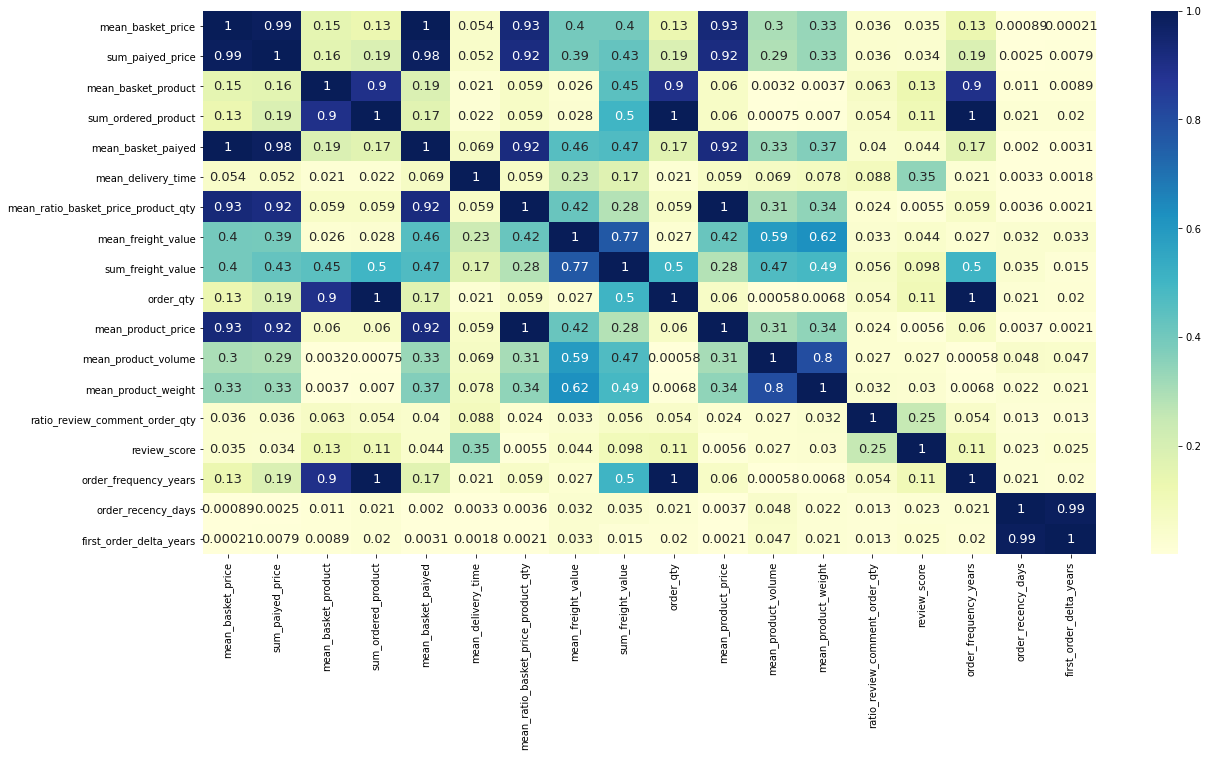

In [63]:
plt.figure(figsize=(20, 10))
sns.heatmap(abs(data_agg_quant.corr()), annot=True,
            annot_kws={"fontsize":13},
            cmap="YlGnBu")
plot.set_xlabel(' ', fontsize=16)
plot.set_ylabel(f" ", fontsize=18)
plot.tick_params(labelsize=18)
plt.savefig(f"corr_table_plot.png", bbox_inches="tight")

### Variables catégorielles

In [39]:
for col in data_agg_cat.columns:
    print(f"{col} a {len(data_agg_cat[col].value_counts())} catégories")

most_payment_type a 4 catégories
customer_state a 27 catégories
product_category_name_english a 71 catégories
product_category_new a 11 catégories
seller_state a 22 catégories


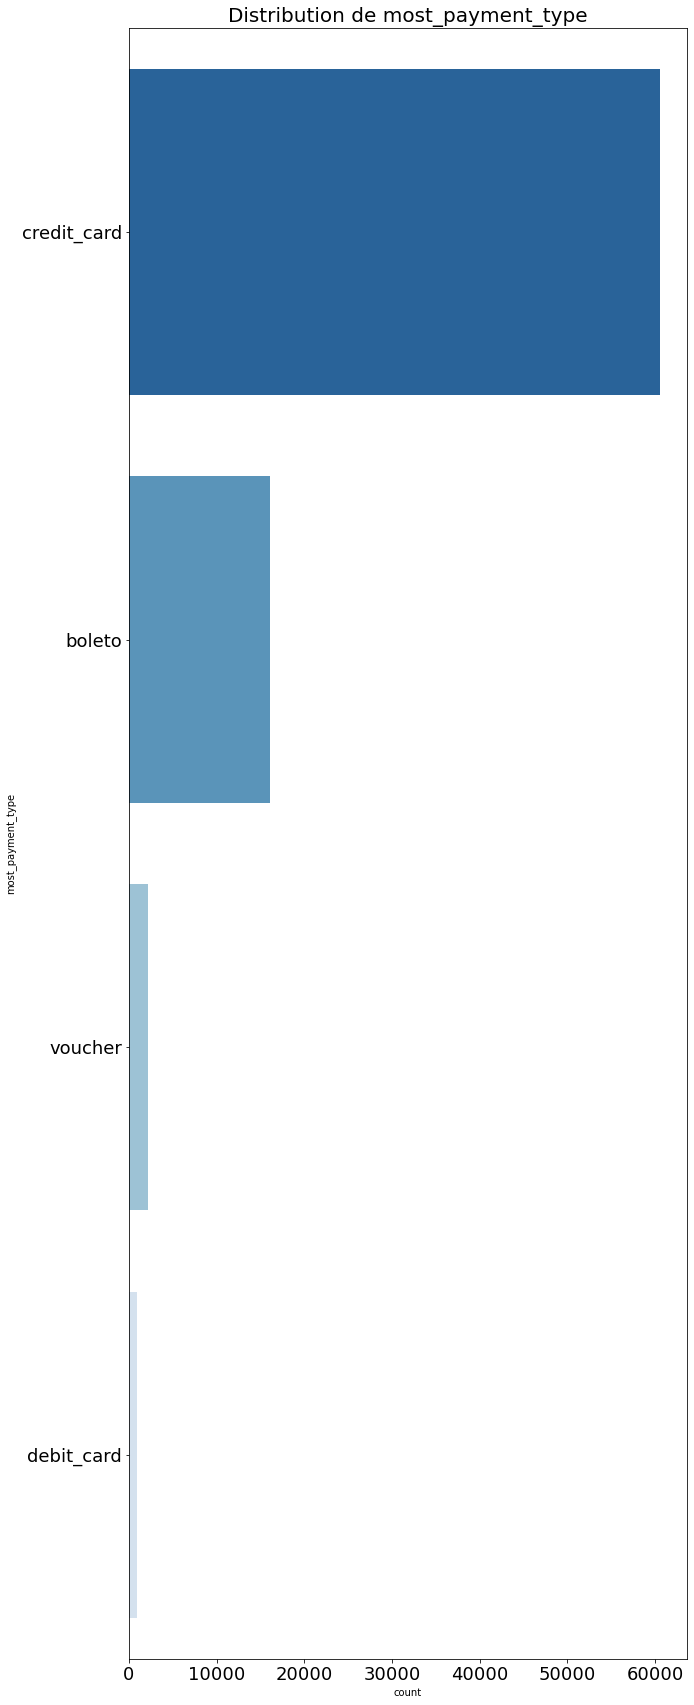

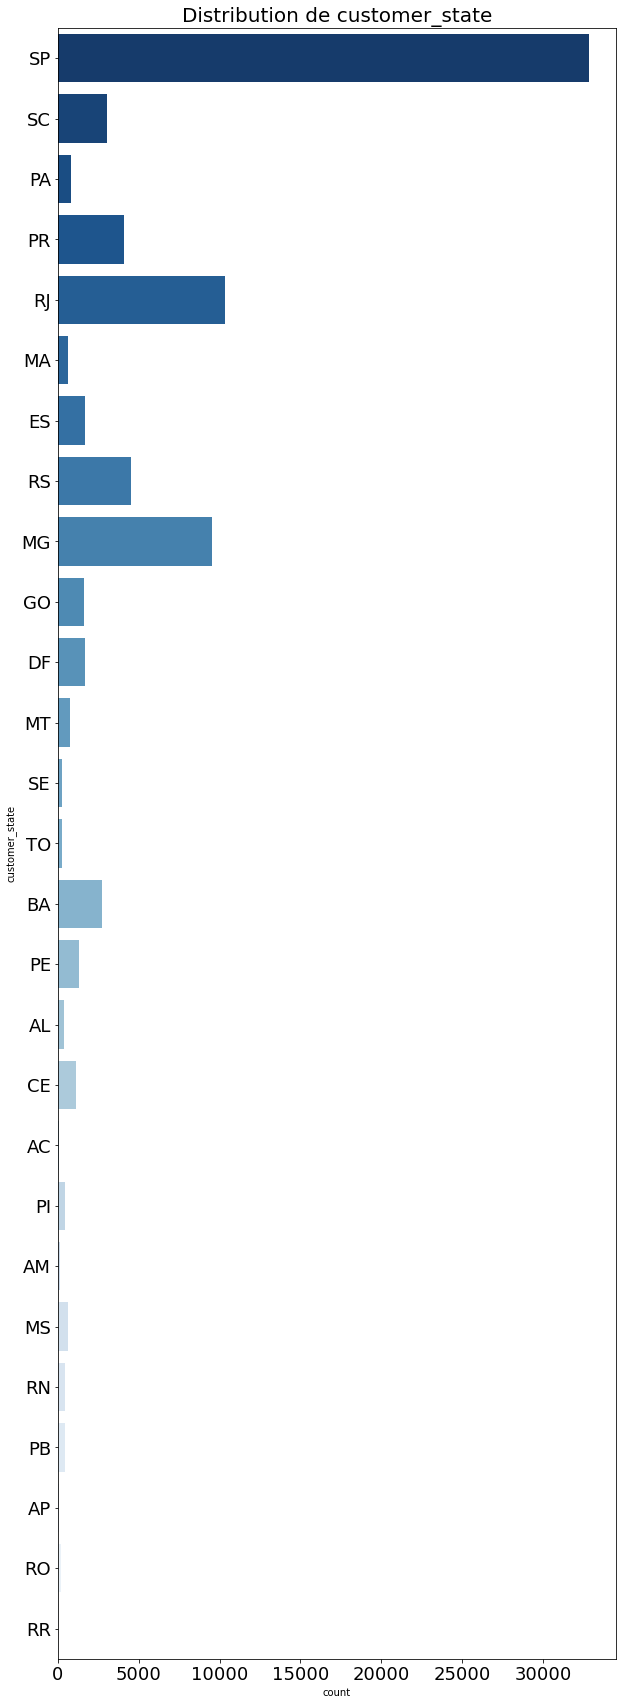

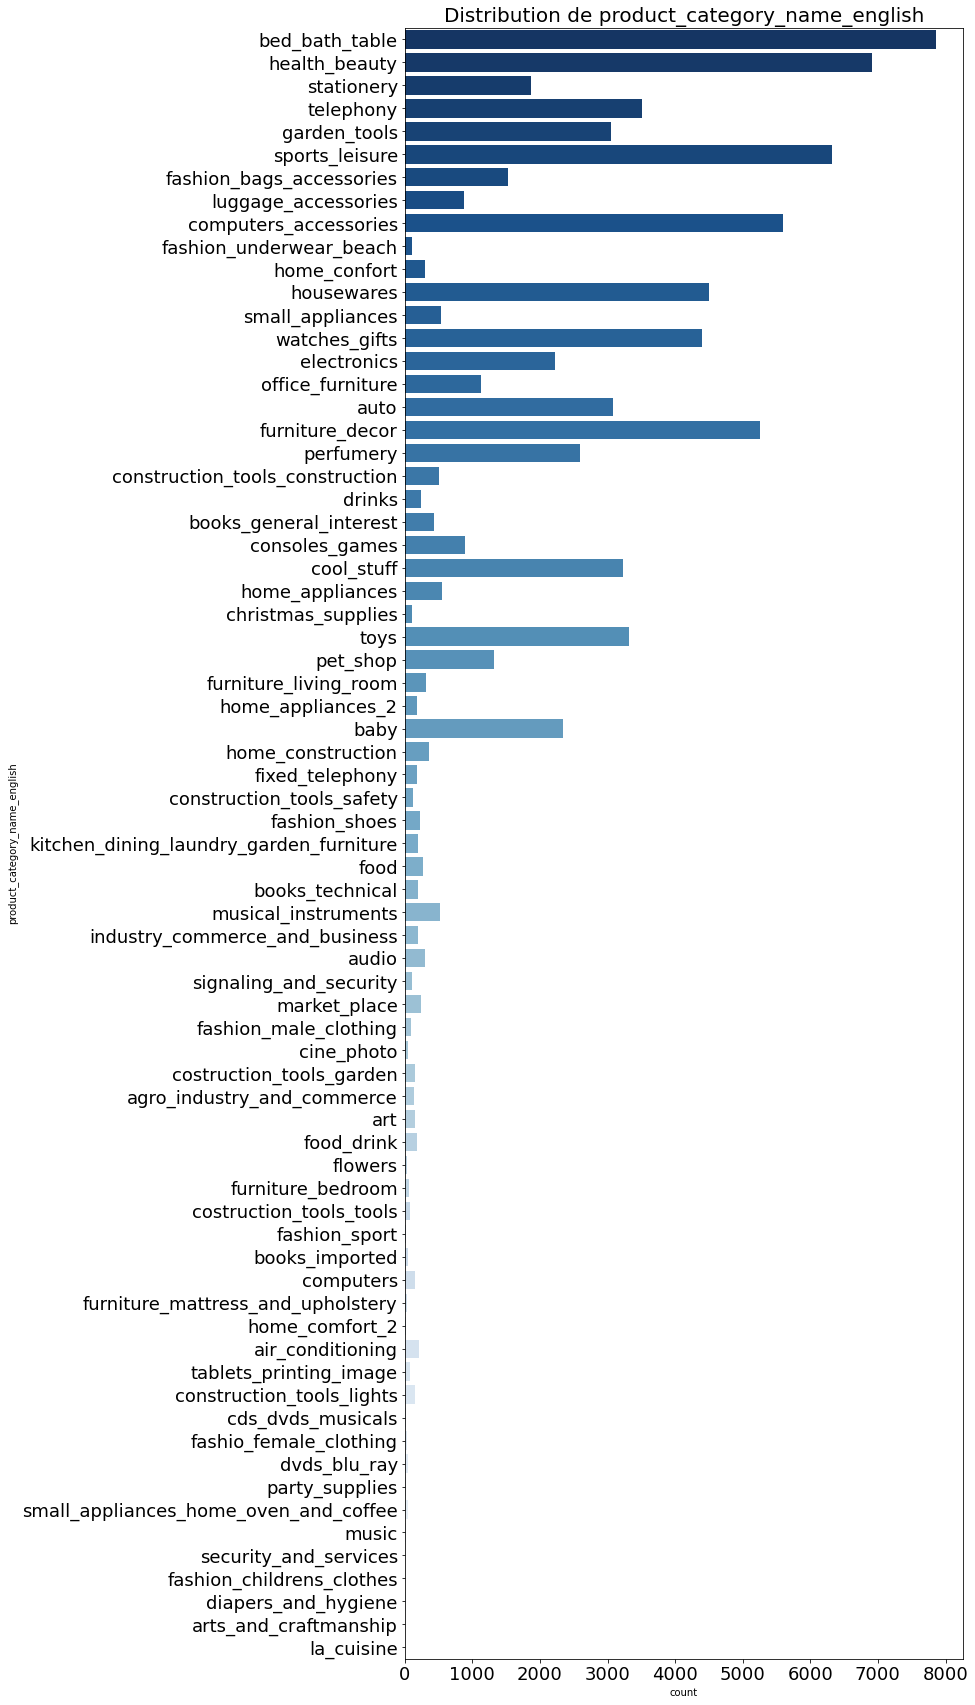

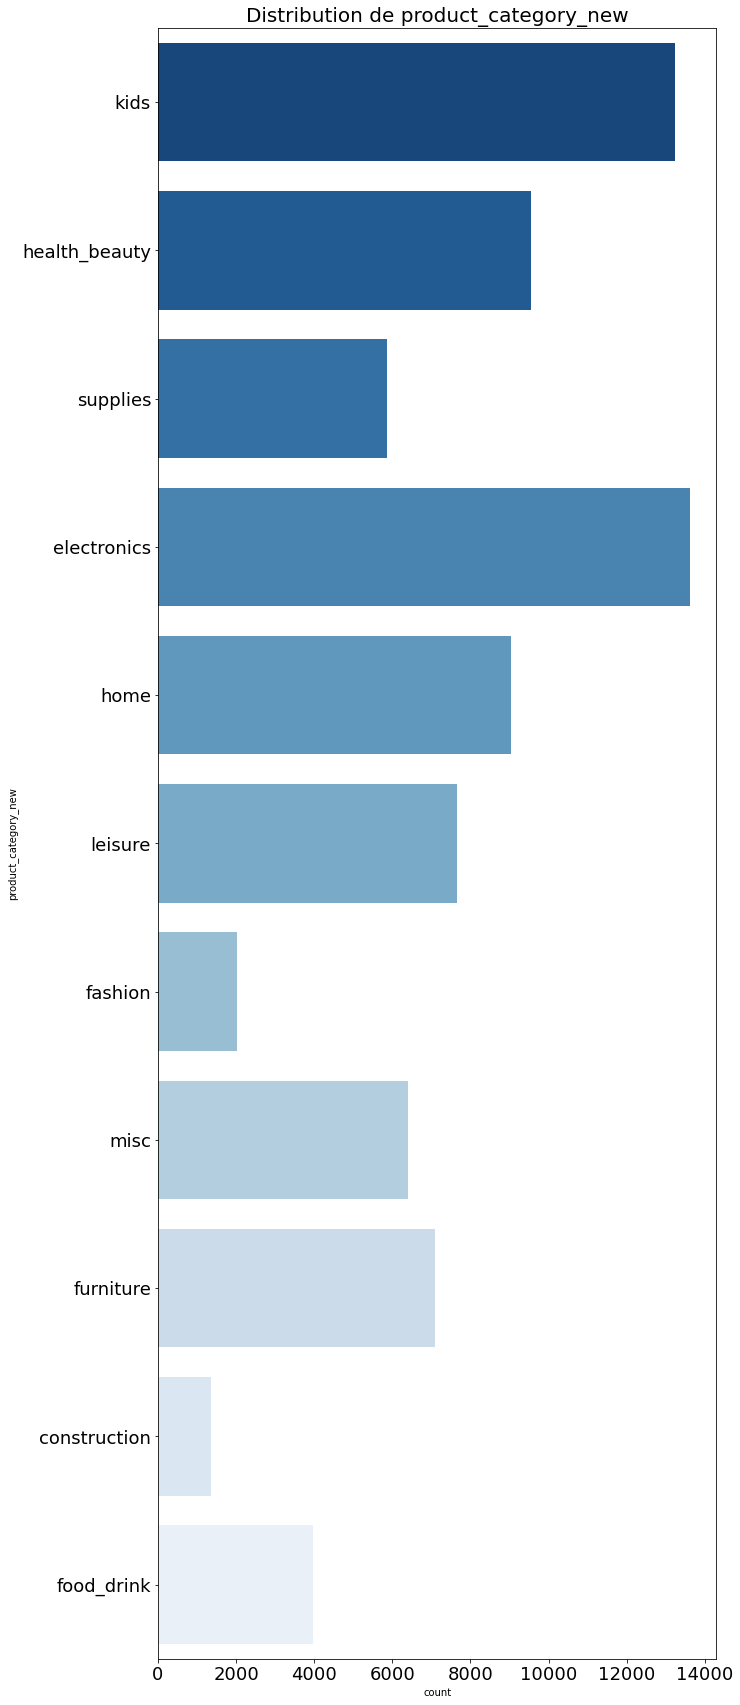

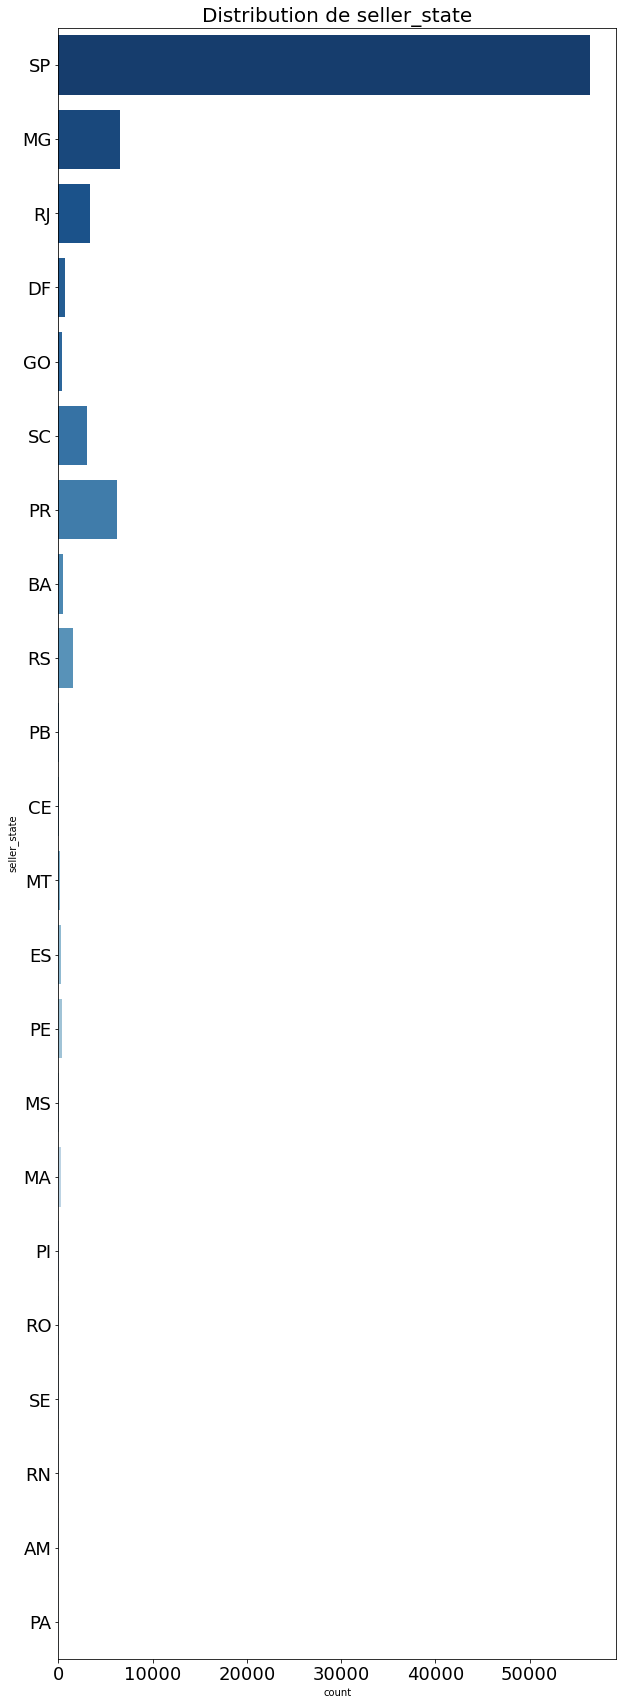

In [40]:
for n in range(data_agg_cat.shape[1]):
    plt.figure(figsize=(10, 30))
    plot = sns.countplot(y=data_agg_cat.iloc[:, n], palette='Blues_r')
    plt.title(f"Distribution de {data_agg_cat.iloc[:, n].name}",
              fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [41]:
# Construction d'une DF pour une heatmap de eta²
df_eta = pd.DataFrame({'None': [0 for x in range(len(cat_var))]},
                      index=data_agg_cat.columns)
for col in data_agg_quant.columns:
    list_eta = [eta_squared(data_agg_cat.dropna()[col1],
                            data_agg_quant.dropna()[col])
                for col1 in data_agg_cat.columns]
    df_eta[col] = list_eta

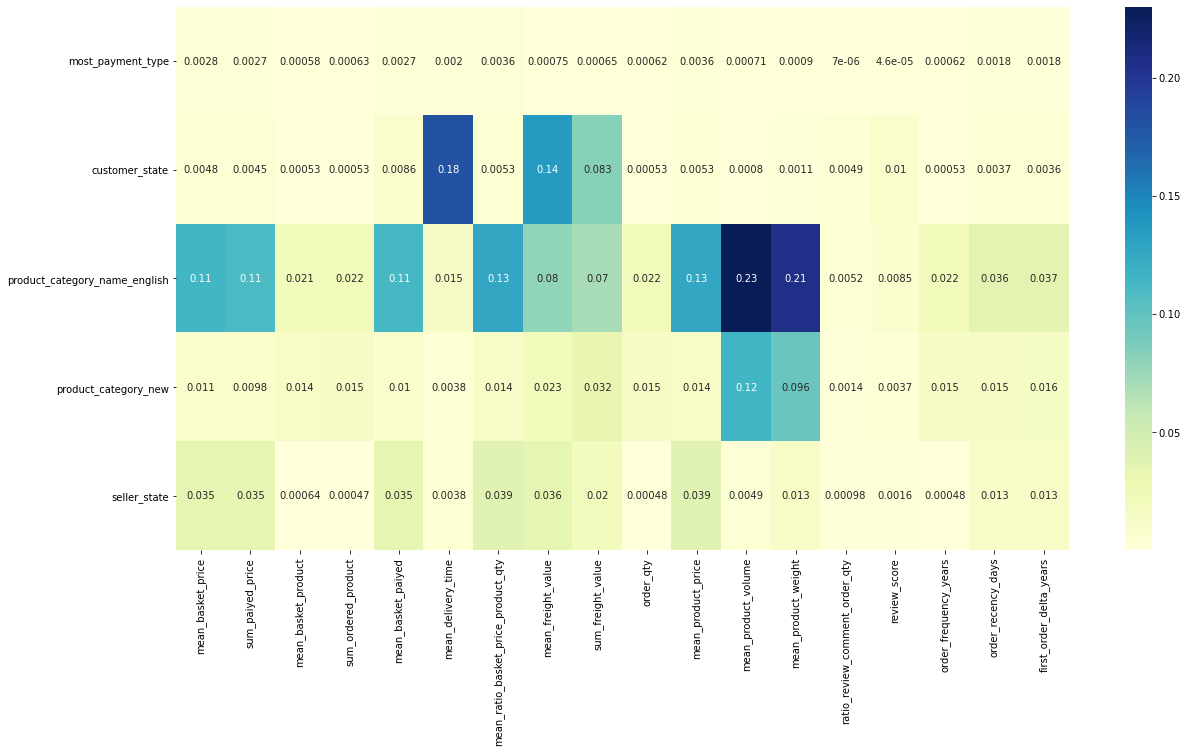

In [42]:
# Heatmap eta²
plt.figure(figsize=(20, 10))
plot = sns.heatmap(df_eta.drop(columns=['None']), annot=True,  cmap="YlGnBu")
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, ha="right")
# plt.savefig(f"ANOVA_plot.png", bbox_inches = "tight")
plt.show()

In [43]:
from scipy.stats import chi2_contingency

for col1 in data_agg_cat.columns:
    for col2 in data_agg_cat.columns:
        if col1 != col2:
            tab = pd.crosstab(data_agg_4[col1], data_agg_4[col2])
            tab.loc['Total', :] = tab.sum()
            tab.loc[:, 'Total'] = tab.sum(axis=1)
            chi2, p, dof, ex = chi2_contingency(tab)
            display(f"Pour {col1} et {col2}, on a chi2 = {chi2} pour p = {p}")

'Pour most_payment_type et customer_state, on a chi2 = 385.45115373106376 pour p = 8.122981328712259e-33'

'Pour most_payment_type et product_category_name_english, on a chi2 = 748.9870439679328 pour p = 1.3832834872832027e-43'

'Pour most_payment_type et product_category_new, on a chi2 = 378.4642649318537 pour p = 9.480816414219472e-55'

'Pour most_payment_type et seller_state, on a chi2 = 140.83948843047574 pour p = 0.0002989227206217769'

'Pour customer_state et most_payment_type, on a chi2 = 385.4511537310638 pour p = 8.122981328712026e-33'

'Pour customer_state et product_category_name_english, on a chi2 = 3705.5200957033258 pour p = 1.305076130331199e-116'

'Pour customer_state et product_category_new, on a chi2 = 918.397099761099 pour p = 1.1565739116542924e-64'

'Pour customer_state et seller_state, on a chi2 = 5163.793523633054 pour p = 0.0'

'Pour product_category_name_english et most_payment_type, on a chi2 = 748.9870439679328 pour p = 1.3832834872832027e-43'

'Pour product_category_name_english et customer_state, on a chi2 = 3705.5200957033258 pour p = 1.305076130331199e-116'

'Pour product_category_name_english et product_category_new, on a chi2 = 786012.9154999466 pour p = 0.0'

'Pour product_category_name_english et seller_state, on a chi2 = 65450.233589186 pour p = 0.0'

'Pour product_category_new et most_payment_type, on a chi2 = 378.46426493185373 pour p = 9.480816414219202e-55'

'Pour product_category_new et customer_state, on a chi2 = 918.397099761099 pour p = 1.1565739116542924e-64'

'Pour product_category_new et product_category_name_english, on a chi2 = 786012.9154999466 pour p = 0.0'

'Pour product_category_new et seller_state, on a chi2 = 15137.882474788255 pour p = 0.0'

'Pour seller_state et most_payment_type, on a chi2 = 140.83948843047574 pour p = 0.0002989227206217769'

'Pour seller_state et customer_state, on a chi2 = 5163.793523633054 pour p = 0.0'

'Pour seller_state et product_category_name_english, on a chi2 = 65450.23358918599 pour p = 0.0'

'Pour seller_state et product_category_new, on a chi2 = 15137.882474788257 pour p = 0.0'